In [1]:
import numpy as np
import pandas as pd
import naima
from astropy.io import fits
import matplotlib.pyplot as plt

In [2]:
hdul = fits.open('acisf07302N003_evt2.fits.gz')

In [3]:
hdul.info()

Filename: acisf07302N003_evt2.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      30   ()      
  1  EVENTS        1 BinTableHDU    825   142550R x 19C   [1D, 1I, 1I, 1J, 1I, 1I, 1I, 1I, 1E, 1E, 1E, 1E, 1J, 1J, 1E, 1J, 1I, 1I, 32X]   
  2  GTI           7 BinTableHDU     28   1R x 2C   [1D, 1D]   


In [4]:
hdul[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
HDUNAME = 'PRIMARY '                                                            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
ORIGIN  = 'ASC     '           / Source of FITS file                            
CREATOR = 'cxc - Version DS10.9' / tool that created this output                
CHECKSUM= 'R746R633R633R633'   / HDU checksum updated 2020-12-09T19:45:33       
DATASUM = '        '        

In [5]:
hdul[2].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   16 / width of table in bytes                        
NAXIS2  =                    1 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    2 / number of fields in each row                   
EXTNAME = 'GTI     '           / name of this binary table extension            
EXTVER  =                    7                                                  
HDUNAME = 'GTI7    '           / ASCDM block name                               
TTYPE1  = 'START   '           / S/C TT corresponding to mid-exposure           
TFORM1  = '1D      '        

In [6]:
hdul[2].data

FITS_rec([(2.5991353e+08, 2.59986003e+08)],
         dtype=(numpy.record, [('START', '>f8'), ('STOP', '>f8')]))

In [7]:
hdul[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   64 / width of table in bytes                        
NAXIS2  =               142550 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                   19 / number of fields in each row                   
EXTNAME = 'EVENTS  '           / name of this binary table extension            
HDUNAME = 'EVENTS  '           / ASCDM block name                               
TTYPE1  = 'time    '           / S/C TT corresponding to mid-exposure           
TFORM1  = '1D      '           / format of field                                
TUNIT1  = 's       '        

In [8]:
hdul[1].data

FITS_rec([(2.59913530e+08, 7, 1,  1667, 458, 404, 4375, 2106, 4333.887 , 4224.668 , 4028.0703, 3855.234 , 2575, 2128, 12066.586  ,  827,  22, 6, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
          (2.59913530e+08, 7, 2,  1667, 528, 580, 4445, 2282, 4403.7544, 4048.4934, 3857.0442, 3936.8967,   58,   46,   306.5475 ,   21,  16, 4, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
          (2.59913530e+08, 7, 2,  1667, 541, 580, 4458, 2282, 4415.8975, 4048.487 , 3848.1365, 3928.6443,   96,   81,   479.92664,   33,   8, 3, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
          ...,
          (2.59986002e+08, 7, 2, 87837, 715, 431, 4632, 2133, 4590.5195, 4197.566 , 3793.5156, 3685.4126, 2982, 2905, 13801.64   ,  946,  22, 6, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
         

# Applying the GTI as a filter

In [9]:
gti = hdul[2].data[0]
gti

(259913529.8869672, 259986002.68804714)

In [10]:
time = hdul[1].data['time']
energy = hdul[1].data['energy']
xCoord = hdul[1].data['x']
yCoord = hdul[1].data['y']


In [12]:
(time.min(), time.max())  #Clearly no GTI correction need be applied, since the times are already within the GTI

(259913530.11175352, 259986001.9827173)

# Plotting the image

In [19]:
(xCoord.min(), xCoord.max()), (yCoord.min(), yCoord.max())

((3417.797, 4370.2847), (3427.8342, 4342.9688))

In [21]:
#creating the image
# xPixels = 1024
# yPixels - 1024
xCoord.size, yCoord.size

(142550, 142550)

In [26]:
np.array(xCoord)

array([4028.0703, 3857.0442, 3848.1365, ..., 3793.5156, 3812.613 ,
       4227.2285], dtype=float32)

In [76]:
def generateImage(xPixels, yPixels, xCoord, yCoord):
    imageArray = []
    xCoordBin = np.linspace(xCoord.min(), xCoord.max(), xPixels+1)
    yCoordBin = np.linspace(yCoord.min(), yCoord.max(), yPixels+1)
    xCoord = np.array(xCoord)
    yCoord = np.array(yCoord)
     
    for j in range(len(yCoordBin)-1):
        imageX = []
        for i in range(len(xCoordBin)-1):
            imageX.append(((xCoord<xCoordBin[i+1])&(xCoord>xCoordBin[i])&(yCoord<yCoordBin[j+1])&(yCoord>yCoordBin[j])).sum())
            print(i, j)
        imageArray.append(imageX)
    return imageArray
            
    

In [100]:
image = generateImage(256, 256, xCoord, yCoord)

0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 0
15 0
16 0
17 0
18 0
19 0
20 0
21 0
22 0
23 0
24 0
25 0
26 0
27 0
28 0
29 0
30 0
31 0
32 0
33 0
34 0
35 0
36 0
37 0
38 0
39 0
40 0
41 0
42 0
43 0
44 0
45 0
46 0
47 0
48 0
49 0
50 0
51 0
52 0
53 0
54 0
55 0
56 0
57 0
58 0
59 0
60 0
61 0
62 0
63 0
64 0
65 0
66 0
67 0
68 0
69 0
70 0
71 0
72 0
73 0
74 0
75 0
76 0
77 0
78 0
79 0
80 0
81 0
82 0
83 0
84 0
85 0
86 0
87 0
88 0
89 0
90 0
91 0
92 0
93 0
94 0
95 0
96 0
97 0
98 0
99 0
100 0
101 0
102 0
103 0
104 0
105 0
106 0
107 0
108 0
109 0
110 0
111 0
112 0
113 0
114 0
115 0
116 0
117 0
118 0
119 0
120 0
121 0
122 0
123 0
124 0
125 0
126 0
127 0
128 0
129 0
130 0
131 0
132 0
133 0
134 0
135 0
136 0
137 0
138 0
139 0
140 0
141 0
142 0
143 0
144 0
145 0
146 0
147 0
148 0
149 0
150 0
151 0
152 0
153 0
154 0
155 0
156 0
157 0
158 0
159 0
160 0
161 0
162 0
163 0
164 0
165 0
166 0
167 0
168 0
169 0
170 0
171 0
172 0
173 0
174 0
175 0
176 0
177 0
178 0
179 0
180 0
181 0
182 0
183 0
184 0


51 6
52 6
53 6
54 6
55 6
56 6
57 6
58 6
59 6
60 6
61 6
62 6
63 6
64 6
65 6
66 6
67 6
68 6
69 6
70 6
71 6
72 6
73 6
74 6
75 6
76 6
77 6
78 6
79 6
80 6
81 6
82 6
83 6
84 6
85 6
86 6
87 6
88 6
89 6
90 6
91 6
92 6
93 6
94 6
95 6
96 6
97 6
98 6
99 6
100 6
101 6
102 6
103 6
104 6
105 6
106 6
107 6
108 6
109 6
110 6
111 6
112 6
113 6
114 6
115 6
116 6
117 6
118 6
119 6
120 6
121 6
122 6
123 6
124 6
125 6
126 6
127 6
128 6
129 6
130 6
131 6
132 6
133 6
134 6
135 6
136 6
137 6
138 6
139 6
140 6
141 6
142 6
143 6
144 6
145 6
146 6
147 6
148 6
149 6
150 6
151 6
152 6
153 6
154 6
155 6
156 6
157 6
158 6
159 6
160 6
161 6
162 6
163 6
164 6
165 6
166 6
167 6
168 6
169 6
170 6
171 6
172 6
173 6
174 6
175 6
176 6
177 6
178 6
179 6
180 6
181 6
182 6
183 6
184 6
185 6
186 6
187 6
188 6
189 6
190 6
191 6
192 6
193 6
194 6
195 6
196 6
197 6
198 6
199 6
200 6
201 6
202 6
203 6
204 6
205 6
206 6
207 6
208 6
209 6
210 6
211 6
212 6
213 6
214 6
215 6
216 6
217 6
218 6
219 6
220 6
221 6
222 6
223 6
224 6
225 6

19 12
20 12
21 12
22 12
23 12
24 12
25 12
26 12
27 12
28 12
29 12
30 12
31 12
32 12
33 12
34 12
35 12
36 12
37 12
38 12
39 12
40 12
41 12
42 12
43 12
44 12
45 12
46 12
47 12
48 12
49 12
50 12
51 12
52 12
53 12
54 12
55 12
56 12
57 12
58 12
59 12
60 12
61 12
62 12
63 12
64 12
65 12
66 12
67 12
68 12
69 12
70 12
71 12
72 12
73 12
74 12
75 12
76 12
77 12
78 12
79 12
80 12
81 12
82 12
83 12
84 12
85 12
86 12
87 12
88 12
89 12
90 12
91 12
92 12
93 12
94 12
95 12
96 12
97 12
98 12
99 12
100 12
101 12
102 12
103 12
104 12
105 12
106 12
107 12
108 12
109 12
110 12
111 12
112 12
113 12
114 12
115 12
116 12
117 12
118 12
119 12
120 12
121 12
122 12
123 12
124 12
125 12
126 12
127 12
128 12
129 12
130 12
131 12
132 12
133 12
134 12
135 12
136 12
137 12
138 12
139 12
140 12
141 12
142 12
143 12
144 12
145 12
146 12
147 12
148 12
149 12
150 12
151 12
152 12
153 12
154 12
155 12
156 12
157 12
158 12
159 12
160 12
161 12
162 12
163 12
164 12
165 12
166 12
167 12
168 12
169 12
170 12
171 12
172 12
173

16 17
17 17
18 17
19 17
20 17
21 17
22 17
23 17
24 17
25 17
26 17
27 17
28 17
29 17
30 17
31 17
32 17
33 17
34 17
35 17
36 17
37 17
38 17
39 17
40 17
41 17
42 17
43 17
44 17
45 17
46 17
47 17
48 17
49 17
50 17
51 17
52 17
53 17
54 17
55 17
56 17
57 17
58 17
59 17
60 17
61 17
62 17
63 17
64 17
65 17
66 17
67 17
68 17
69 17
70 17
71 17
72 17
73 17
74 17
75 17
76 17
77 17
78 17
79 17
80 17
81 17
82 17
83 17
84 17
85 17
86 17
87 17
88 17
89 17
90 17
91 17
92 17
93 17
94 17
95 17
96 17
97 17
98 17
99 17
100 17
101 17
102 17
103 17
104 17
105 17
106 17
107 17
108 17
109 17
110 17
111 17
112 17
113 17
114 17
115 17
116 17
117 17
118 17
119 17
120 17
121 17
122 17
123 17
124 17
125 17
126 17
127 17
128 17
129 17
130 17
131 17
132 17
133 17
134 17
135 17
136 17
137 17
138 17
139 17
140 17
141 17
142 17
143 17
144 17
145 17
146 17
147 17
148 17
149 17
150 17
151 17
152 17
153 17
154 17
155 17
156 17
157 17
158 17
159 17
160 17
161 17
162 17
163 17
164 17
165 17
166 17
167 17
168 17
169 17
170 17

4 22
5 22
6 22
7 22
8 22
9 22
10 22
11 22
12 22
13 22
14 22
15 22
16 22
17 22
18 22
19 22
20 22
21 22
22 22
23 22
24 22
25 22
26 22
27 22
28 22
29 22
30 22
31 22
32 22
33 22
34 22
35 22
36 22
37 22
38 22
39 22
40 22
41 22
42 22
43 22
44 22
45 22
46 22
47 22
48 22
49 22
50 22
51 22
52 22
53 22
54 22
55 22
56 22
57 22
58 22
59 22
60 22
61 22
62 22
63 22
64 22
65 22
66 22
67 22
68 22
69 22
70 22
71 22
72 22
73 22
74 22
75 22
76 22
77 22
78 22
79 22
80 22
81 22
82 22
83 22
84 22
85 22
86 22
87 22
88 22
89 22
90 22
91 22
92 22
93 22
94 22
95 22
96 22
97 22
98 22
99 22
100 22
101 22
102 22
103 22
104 22
105 22
106 22
107 22
108 22
109 22
110 22
111 22
112 22
113 22
114 22
115 22
116 22
117 22
118 22
119 22
120 22
121 22
122 22
123 22
124 22
125 22
126 22
127 22
128 22
129 22
130 22
131 22
132 22
133 22
134 22
135 22
136 22
137 22
138 22
139 22
140 22
141 22
142 22
143 22
144 22
145 22
146 22
147 22
148 22
149 22
150 22
151 22
152 22
153 22
154 22
155 22
156 22
157 22
158 22
159 22
160 22
161

143 27
144 27
145 27
146 27
147 27
148 27
149 27
150 27
151 27
152 27
153 27
154 27
155 27
156 27
157 27
158 27
159 27
160 27
161 27
162 27
163 27
164 27
165 27
166 27
167 27
168 27
169 27
170 27
171 27
172 27
173 27
174 27
175 27
176 27
177 27
178 27
179 27
180 27
181 27
182 27
183 27
184 27
185 27
186 27
187 27
188 27
189 27
190 27
191 27
192 27
193 27
194 27
195 27
196 27
197 27
198 27
199 27
200 27
201 27
202 27
203 27
204 27
205 27
206 27
207 27
208 27
209 27
210 27
211 27
212 27
213 27
214 27
215 27
216 27
217 27
218 27
219 27
220 27
221 27
222 27
223 27
224 27
225 27
226 27
227 27
228 27
229 27
230 27
231 27
232 27
233 27
234 27
235 27
236 27
237 27
238 27
239 27
240 27
241 27
242 27
243 27
244 27
245 27
246 27
247 27
248 27
249 27
250 27
251 27
252 27
253 27
254 27
255 27
0 28
1 28
2 28
3 28
4 28
5 28
6 28
7 28
8 28
9 28
10 28
11 28
12 28
13 28
14 28
15 28
16 28
17 28
18 28
19 28
20 28
21 28
22 28
23 28
24 28
25 28
26 28
27 28
28 28
29 28
30 28
31 28
32 28
33 28
34 28
35 28
36 

221 32
222 32
223 32
224 32
225 32
226 32
227 32
228 32
229 32
230 32
231 32
232 32
233 32
234 32
235 32
236 32
237 32
238 32
239 32
240 32
241 32
242 32
243 32
244 32
245 32
246 32
247 32
248 32
249 32
250 32
251 32
252 32
253 32
254 32
255 32
0 33
1 33
2 33
3 33
4 33
5 33
6 33
7 33
8 33
9 33
10 33
11 33
12 33
13 33
14 33
15 33
16 33
17 33
18 33
19 33
20 33
21 33
22 33
23 33
24 33
25 33
26 33
27 33
28 33
29 33
30 33
31 33
32 33
33 33
34 33
35 33
36 33
37 33
38 33
39 33
40 33
41 33
42 33
43 33
44 33
45 33
46 33
47 33
48 33
49 33
50 33
51 33
52 33
53 33
54 33
55 33
56 33
57 33
58 33
59 33
60 33
61 33
62 33
63 33
64 33
65 33
66 33
67 33
68 33
69 33
70 33
71 33
72 33
73 33
74 33
75 33
76 33
77 33
78 33
79 33
80 33
81 33
82 33
83 33
84 33
85 33
86 33
87 33
88 33
89 33
90 33
91 33
92 33
93 33
94 33
95 33
96 33
97 33
98 33
99 33
100 33
101 33
102 33
103 33
104 33
105 33
106 33
107 33
108 33
109 33
110 33
111 33
112 33
113 33
114 33
115 33
116 33
117 33
118 33
119 33
120 33
121 33
122 33
123 

20 38
21 38
22 38
23 38
24 38
25 38
26 38
27 38
28 38
29 38
30 38
31 38
32 38
33 38
34 38
35 38
36 38
37 38
38 38
39 38
40 38
41 38
42 38
43 38
44 38
45 38
46 38
47 38
48 38
49 38
50 38
51 38
52 38
53 38
54 38
55 38
56 38
57 38
58 38
59 38
60 38
61 38
62 38
63 38
64 38
65 38
66 38
67 38
68 38
69 38
70 38
71 38
72 38
73 38
74 38
75 38
76 38
77 38
78 38
79 38
80 38
81 38
82 38
83 38
84 38
85 38
86 38
87 38
88 38
89 38
90 38
91 38
92 38
93 38
94 38
95 38
96 38
97 38
98 38
99 38
100 38
101 38
102 38
103 38
104 38
105 38
106 38
107 38
108 38
109 38
110 38
111 38
112 38
113 38
114 38
115 38
116 38
117 38
118 38
119 38
120 38
121 38
122 38
123 38
124 38
125 38
126 38
127 38
128 38
129 38
130 38
131 38
132 38
133 38
134 38
135 38
136 38
137 38
138 38
139 38
140 38
141 38
142 38
143 38
144 38
145 38
146 38
147 38
148 38
149 38
150 38
151 38
152 38
153 38
154 38
155 38
156 38
157 38
158 38
159 38
160 38
161 38
162 38
163 38
164 38
165 38
166 38
167 38
168 38
169 38
170 38
171 38
172 38
173 38
17

107 43
108 43
109 43
110 43
111 43
112 43
113 43
114 43
115 43
116 43
117 43
118 43
119 43
120 43
121 43
122 43
123 43
124 43
125 43
126 43
127 43
128 43
129 43
130 43
131 43
132 43
133 43
134 43
135 43
136 43
137 43
138 43
139 43
140 43
141 43
142 43
143 43
144 43
145 43
146 43
147 43
148 43
149 43
150 43
151 43
152 43
153 43
154 43
155 43
156 43
157 43
158 43
159 43
160 43
161 43
162 43
163 43
164 43
165 43
166 43
167 43
168 43
169 43
170 43
171 43
172 43
173 43
174 43
175 43
176 43
177 43
178 43
179 43
180 43
181 43
182 43
183 43
184 43
185 43
186 43
187 43
188 43
189 43
190 43
191 43
192 43
193 43
194 43
195 43
196 43
197 43
198 43
199 43
200 43
201 43
202 43
203 43
204 43
205 43
206 43
207 43
208 43
209 43
210 43
211 43
212 43
213 43
214 43
215 43
216 43
217 43
218 43
219 43
220 43
221 43
222 43
223 43
224 43
225 43
226 43
227 43
228 43
229 43
230 43
231 43
232 43
233 43
234 43
235 43
236 43
237 43
238 43
239 43
240 43
241 43
242 43
243 43
244 43
245 43
246 43
247 43
248 43
249 43

81 48
82 48
83 48
84 48
85 48
86 48
87 48
88 48
89 48
90 48
91 48
92 48
93 48
94 48
95 48
96 48
97 48
98 48
99 48
100 48
101 48
102 48
103 48
104 48
105 48
106 48
107 48
108 48
109 48
110 48
111 48
112 48
113 48
114 48
115 48
116 48
117 48
118 48
119 48
120 48
121 48
122 48
123 48
124 48
125 48
126 48
127 48
128 48
129 48
130 48
131 48
132 48
133 48
134 48
135 48
136 48
137 48
138 48
139 48
140 48
141 48
142 48
143 48
144 48
145 48
146 48
147 48
148 48
149 48
150 48
151 48
152 48
153 48
154 48
155 48
156 48
157 48
158 48
159 48
160 48
161 48
162 48
163 48
164 48
165 48
166 48
167 48
168 48
169 48
170 48
171 48
172 48
173 48
174 48
175 48
176 48
177 48
178 48
179 48
180 48
181 48
182 48
183 48
184 48
185 48
186 48
187 48
188 48
189 48
190 48
191 48
192 48
193 48
194 48
195 48
196 48
197 48
198 48
199 48
200 48
201 48
202 48
203 48
204 48
205 48
206 48
207 48
208 48
209 48
210 48
211 48
212 48
213 48
214 48
215 48
216 48
217 48
218 48
219 48
220 48
221 48
222 48
223 48
224 48
225 48
226 

161 53
162 53
163 53
164 53
165 53
166 53
167 53
168 53
169 53
170 53
171 53
172 53
173 53
174 53
175 53
176 53
177 53
178 53
179 53
180 53
181 53
182 53
183 53
184 53
185 53
186 53
187 53
188 53
189 53
190 53
191 53
192 53
193 53
194 53
195 53
196 53
197 53
198 53
199 53
200 53
201 53
202 53
203 53
204 53
205 53
206 53
207 53
208 53
209 53
210 53
211 53
212 53
213 53
214 53
215 53
216 53
217 53
218 53
219 53
220 53
221 53
222 53
223 53
224 53
225 53
226 53
227 53
228 53
229 53
230 53
231 53
232 53
233 53
234 53
235 53
236 53
237 53
238 53
239 53
240 53
241 53
242 53
243 53
244 53
245 53
246 53
247 53
248 53
249 53
250 53
251 53
252 53
253 53
254 53
255 53
0 54
1 54
2 54
3 54
4 54
5 54
6 54
7 54
8 54
9 54
10 54
11 54
12 54
13 54
14 54
15 54
16 54
17 54
18 54
19 54
20 54
21 54
22 54
23 54
24 54
25 54
26 54
27 54
28 54
29 54
30 54
31 54
32 54
33 54
34 54
35 54
36 54
37 54
38 54
39 54
40 54
41 54
42 54
43 54
44 54
45 54
46 54
47 54
48 54
49 54
50 54
51 54
52 54
53 54
54 54
55 54
56 54
57 

232 58
233 58
234 58
235 58
236 58
237 58
238 58
239 58
240 58
241 58
242 58
243 58
244 58
245 58
246 58
247 58
248 58
249 58
250 58
251 58
252 58
253 58
254 58
255 58
0 59
1 59
2 59
3 59
4 59
5 59
6 59
7 59
8 59
9 59
10 59
11 59
12 59
13 59
14 59
15 59
16 59
17 59
18 59
19 59
20 59
21 59
22 59
23 59
24 59
25 59
26 59
27 59
28 59
29 59
30 59
31 59
32 59
33 59
34 59
35 59
36 59
37 59
38 59
39 59
40 59
41 59
42 59
43 59
44 59
45 59
46 59
47 59
48 59
49 59
50 59
51 59
52 59
53 59
54 59
55 59
56 59
57 59
58 59
59 59
60 59
61 59
62 59
63 59
64 59
65 59
66 59
67 59
68 59
69 59
70 59
71 59
72 59
73 59
74 59
75 59
76 59
77 59
78 59
79 59
80 59
81 59
82 59
83 59
84 59
85 59
86 59
87 59
88 59
89 59
90 59
91 59
92 59
93 59
94 59
95 59
96 59
97 59
98 59
99 59
100 59
101 59
102 59
103 59
104 59
105 59
106 59
107 59
108 59
109 59
110 59
111 59
112 59
113 59
114 59
115 59
116 59
117 59
118 59
119 59
120 59
121 59
122 59
123 59
124 59
125 59
126 59
127 59
128 59
129 59
130 59
131 59
132 59
133 59
134 

3 64
4 64
5 64
6 64
7 64
8 64
9 64
10 64
11 64
12 64
13 64
14 64
15 64
16 64
17 64
18 64
19 64
20 64
21 64
22 64
23 64
24 64
25 64
26 64
27 64
28 64
29 64
30 64
31 64
32 64
33 64
34 64
35 64
36 64
37 64
38 64
39 64
40 64
41 64
42 64
43 64
44 64
45 64
46 64
47 64
48 64
49 64
50 64
51 64
52 64
53 64
54 64
55 64
56 64
57 64
58 64
59 64
60 64
61 64
62 64
63 64
64 64
65 64
66 64
67 64
68 64
69 64
70 64
71 64
72 64
73 64
74 64
75 64
76 64
77 64
78 64
79 64
80 64
81 64
82 64
83 64
84 64
85 64
86 64
87 64
88 64
89 64
90 64
91 64
92 64
93 64
94 64
95 64
96 64
97 64
98 64
99 64
100 64
101 64
102 64
103 64
104 64
105 64
106 64
107 64
108 64
109 64
110 64
111 64
112 64
113 64
114 64
115 64
116 64
117 64
118 64
119 64
120 64
121 64
122 64
123 64
124 64
125 64
126 64
127 64
128 64
129 64
130 64
131 64
132 64
133 64
134 64
135 64
136 64
137 64
138 64
139 64
140 64
141 64
142 64
143 64
144 64
145 64
146 64
147 64
148 64
149 64
150 64
151 64
152 64
153 64
154 64
155 64
156 64
157 64
158 64
159 64
160 6

70 69
71 69
72 69
73 69
74 69
75 69
76 69
77 69
78 69
79 69
80 69
81 69
82 69
83 69
84 69
85 69
86 69
87 69
88 69
89 69
90 69
91 69
92 69
93 69
94 69
95 69
96 69
97 69
98 69
99 69
100 69
101 69
102 69
103 69
104 69
105 69
106 69
107 69
108 69
109 69
110 69
111 69
112 69
113 69
114 69
115 69
116 69
117 69
118 69
119 69
120 69
121 69
122 69
123 69
124 69
125 69
126 69
127 69
128 69
129 69
130 69
131 69
132 69
133 69
134 69
135 69
136 69
137 69
138 69
139 69
140 69
141 69
142 69
143 69
144 69
145 69
146 69
147 69
148 69
149 69
150 69
151 69
152 69
153 69
154 69
155 69
156 69
157 69
158 69
159 69
160 69
161 69
162 69
163 69
164 69
165 69
166 69
167 69
168 69
169 69
170 69
171 69
172 69
173 69
174 69
175 69
176 69
177 69
178 69
179 69
180 69
181 69
182 69
183 69
184 69
185 69
186 69
187 69
188 69
189 69
190 69
191 69
192 69
193 69
194 69
195 69
196 69
197 69
198 69
199 69
200 69
201 69
202 69
203 69
204 69
205 69
206 69
207 69
208 69
209 69
210 69
211 69
212 69
213 69
214 69
215 69
216 69
2

211 74
212 74
213 74
214 74
215 74
216 74
217 74
218 74
219 74
220 74
221 74
222 74
223 74
224 74
225 74
226 74
227 74
228 74
229 74
230 74
231 74
232 74
233 74
234 74
235 74
236 74
237 74
238 74
239 74
240 74
241 74
242 74
243 74
244 74
245 74
246 74
247 74
248 74
249 74
250 74
251 74
252 74
253 74
254 74
255 74
0 75
1 75
2 75
3 75
4 75
5 75
6 75
7 75
8 75
9 75
10 75
11 75
12 75
13 75
14 75
15 75
16 75
17 75
18 75
19 75
20 75
21 75
22 75
23 75
24 75
25 75
26 75
27 75
28 75
29 75
30 75
31 75
32 75
33 75
34 75
35 75
36 75
37 75
38 75
39 75
40 75
41 75
42 75
43 75
44 75
45 75
46 75
47 75
48 75
49 75
50 75
51 75
52 75
53 75
54 75
55 75
56 75
57 75
58 75
59 75
60 75
61 75
62 75
63 75
64 75
65 75
66 75
67 75
68 75
69 75
70 75
71 75
72 75
73 75
74 75
75 75
76 75
77 75
78 75
79 75
80 75
81 75
82 75
83 75
84 75
85 75
86 75
87 75
88 75
89 75
90 75
91 75
92 75
93 75
94 75
95 75
96 75
97 75
98 75
99 75
100 75
101 75
102 75
103 75
104 75
105 75
106 75
107 75
108 75
109 75
110 75
111 75
112 75
113 

49 80
50 80
51 80
52 80
53 80
54 80
55 80
56 80
57 80
58 80
59 80
60 80
61 80
62 80
63 80
64 80
65 80
66 80
67 80
68 80
69 80
70 80
71 80
72 80
73 80
74 80
75 80
76 80
77 80
78 80
79 80
80 80
81 80
82 80
83 80
84 80
85 80
86 80
87 80
88 80
89 80
90 80
91 80
92 80
93 80
94 80
95 80
96 80
97 80
98 80
99 80
100 80
101 80
102 80
103 80
104 80
105 80
106 80
107 80
108 80
109 80
110 80
111 80
112 80
113 80
114 80
115 80
116 80
117 80
118 80
119 80
120 80
121 80
122 80
123 80
124 80
125 80
126 80
127 80
128 80
129 80
130 80
131 80
132 80
133 80
134 80
135 80
136 80
137 80
138 80
139 80
140 80
141 80
142 80
143 80
144 80
145 80
146 80
147 80
148 80
149 80
150 80
151 80
152 80
153 80
154 80
155 80
156 80
157 80
158 80
159 80
160 80
161 80
162 80
163 80
164 80
165 80
166 80
167 80
168 80
169 80
170 80
171 80
172 80
173 80
174 80
175 80
176 80
177 80
178 80
179 80
180 80
181 80
182 80
183 80
184 80
185 80
186 80
187 80
188 80
189 80
190 80
191 80
192 80
193 80
194 80
195 80
196 80
197 80
198 80
1

109 85
110 85
111 85
112 85
113 85
114 85
115 85
116 85
117 85
118 85
119 85
120 85
121 85
122 85
123 85
124 85
125 85
126 85
127 85
128 85
129 85
130 85
131 85
132 85
133 85
134 85
135 85
136 85
137 85
138 85
139 85
140 85
141 85
142 85
143 85
144 85
145 85
146 85
147 85
148 85
149 85
150 85
151 85
152 85
153 85
154 85
155 85
156 85
157 85
158 85
159 85
160 85
161 85
162 85
163 85
164 85
165 85
166 85
167 85
168 85
169 85
170 85
171 85
172 85
173 85
174 85
175 85
176 85
177 85
178 85
179 85
180 85
181 85
182 85
183 85
184 85
185 85
186 85
187 85
188 85
189 85
190 85
191 85
192 85
193 85
194 85
195 85
196 85
197 85
198 85
199 85
200 85
201 85
202 85
203 85
204 85
205 85
206 85
207 85
208 85
209 85
210 85
211 85
212 85
213 85
214 85
215 85
216 85
217 85
218 85
219 85
220 85
221 85
222 85
223 85
224 85
225 85
226 85
227 85
228 85
229 85
230 85
231 85
232 85
233 85
234 85
235 85
236 85
237 85
238 85
239 85
240 85
241 85
242 85
243 85
244 85
245 85
246 85
247 85
248 85
249 85
250 85
251 85

101 90
102 90
103 90
104 90
105 90
106 90
107 90
108 90
109 90
110 90
111 90
112 90
113 90
114 90
115 90
116 90
117 90
118 90
119 90
120 90
121 90
122 90
123 90
124 90
125 90
126 90
127 90
128 90
129 90
130 90
131 90
132 90
133 90
134 90
135 90
136 90
137 90
138 90
139 90
140 90
141 90
142 90
143 90
144 90
145 90
146 90
147 90
148 90
149 90
150 90
151 90
152 90
153 90
154 90
155 90
156 90
157 90
158 90
159 90
160 90
161 90
162 90
163 90
164 90
165 90
166 90
167 90
168 90
169 90
170 90
171 90
172 90
173 90
174 90
175 90
176 90
177 90
178 90
179 90
180 90
181 90
182 90
183 90
184 90
185 90
186 90
187 90
188 90
189 90
190 90
191 90
192 90
193 90
194 90
195 90
196 90
197 90
198 90
199 90
200 90
201 90
202 90
203 90
204 90
205 90
206 90
207 90
208 90
209 90
210 90
211 90
212 90
213 90
214 90
215 90
216 90
217 90
218 90
219 90
220 90
221 90
222 90
223 90
224 90
225 90
226 90
227 90
228 90
229 90
230 90
231 90
232 90
233 90
234 90
235 90
236 90
237 90
238 90
239 90
240 90
241 90
242 90
243 90

191 95
192 95
193 95
194 95
195 95
196 95
197 95
198 95
199 95
200 95
201 95
202 95
203 95
204 95
205 95
206 95
207 95
208 95
209 95
210 95
211 95
212 95
213 95
214 95
215 95
216 95
217 95
218 95
219 95
220 95
221 95
222 95
223 95
224 95
225 95
226 95
227 95
228 95
229 95
230 95
231 95
232 95
233 95
234 95
235 95
236 95
237 95
238 95
239 95
240 95
241 95
242 95
243 95
244 95
245 95
246 95
247 95
248 95
249 95
250 95
251 95
252 95
253 95
254 95
255 95
0 96
1 96
2 96
3 96
4 96
5 96
6 96
7 96
8 96
9 96
10 96
11 96
12 96
13 96
14 96
15 96
16 96
17 96
18 96
19 96
20 96
21 96
22 96
23 96
24 96
25 96
26 96
27 96
28 96
29 96
30 96
31 96
32 96
33 96
34 96
35 96
36 96
37 96
38 96
39 96
40 96
41 96
42 96
43 96
44 96
45 96
46 96
47 96
48 96
49 96
50 96
51 96
52 96
53 96
54 96
55 96
56 96
57 96
58 96
59 96
60 96
61 96
62 96
63 96
64 96
65 96
66 96
67 96
68 96
69 96
70 96
71 96
72 96
73 96
74 96
75 96
76 96
77 96
78 96
79 96
80 96
81 96
82 96
83 96
84 96
85 96
86 96
87 96
88 96
89 96
90 96
91 96
92 

244 100
245 100
246 100
247 100
248 100
249 100
250 100
251 100
252 100
253 100
254 100
255 100
0 101
1 101
2 101
3 101
4 101
5 101
6 101
7 101
8 101
9 101
10 101
11 101
12 101
13 101
14 101
15 101
16 101
17 101
18 101
19 101
20 101
21 101
22 101
23 101
24 101
25 101
26 101
27 101
28 101
29 101
30 101
31 101
32 101
33 101
34 101
35 101
36 101
37 101
38 101
39 101
40 101
41 101
42 101
43 101
44 101
45 101
46 101
47 101
48 101
49 101
50 101
51 101
52 101
53 101
54 101
55 101
56 101
57 101
58 101
59 101
60 101
61 101
62 101
63 101
64 101
65 101
66 101
67 101
68 101
69 101
70 101
71 101
72 101
73 101
74 101
75 101
76 101
77 101
78 101
79 101
80 101
81 101
82 101
83 101
84 101
85 101
86 101
87 101
88 101
89 101
90 101
91 101
92 101
93 101
94 101
95 101
96 101
97 101
98 101
99 101
100 101
101 101
102 101
103 101
104 101
105 101
106 101
107 101
108 101
109 101
110 101
111 101
112 101
113 101
114 101
115 101
116 101
117 101
118 101
119 101
120 101
121 101
122 101
123 101
124 101
125 101
126 10

127 105
128 105
129 105
130 105
131 105
132 105
133 105
134 105
135 105
136 105
137 105
138 105
139 105
140 105
141 105
142 105
143 105
144 105
145 105
146 105
147 105
148 105
149 105
150 105
151 105
152 105
153 105
154 105
155 105
156 105
157 105
158 105
159 105
160 105
161 105
162 105
163 105
164 105
165 105
166 105
167 105
168 105
169 105
170 105
171 105
172 105
173 105
174 105
175 105
176 105
177 105
178 105
179 105
180 105
181 105
182 105
183 105
184 105
185 105
186 105
187 105
188 105
189 105
190 105
191 105
192 105
193 105
194 105
195 105
196 105
197 105
198 105
199 105
200 105
201 105
202 105
203 105
204 105
205 105
206 105
207 105
208 105
209 105
210 105
211 105
212 105
213 105
214 105
215 105
216 105
217 105
218 105
219 105
220 105
221 105
222 105
223 105
224 105
225 105
226 105
227 105
228 105
229 105
230 105
231 105
232 105
233 105
234 105
235 105
236 105
237 105
238 105
239 105
240 105
241 105
242 105
243 105
244 105
245 105
246 105
247 105
248 105
249 105
250 105
251 105


94 110
95 110
96 110
97 110
98 110
99 110
100 110
101 110
102 110
103 110
104 110
105 110
106 110
107 110
108 110
109 110
110 110
111 110
112 110
113 110
114 110
115 110
116 110
117 110
118 110
119 110
120 110
121 110
122 110
123 110
124 110
125 110
126 110
127 110
128 110
129 110
130 110
131 110
132 110
133 110
134 110
135 110
136 110
137 110
138 110
139 110
140 110
141 110
142 110
143 110
144 110
145 110
146 110
147 110
148 110
149 110
150 110
151 110
152 110
153 110
154 110
155 110
156 110
157 110
158 110
159 110
160 110
161 110
162 110
163 110
164 110
165 110
166 110
167 110
168 110
169 110
170 110
171 110
172 110
173 110
174 110
175 110
176 110
177 110
178 110
179 110
180 110
181 110
182 110
183 110
184 110
185 110
186 110
187 110
188 110
189 110
190 110
191 110
192 110
193 110
194 110
195 110
196 110
197 110
198 110
199 110
200 110
201 110
202 110
203 110
204 110
205 110
206 110
207 110
208 110
209 110
210 110
211 110
212 110
213 110
214 110
215 110
216 110
217 110
218 110
219 11

202 114
203 114
204 114
205 114
206 114
207 114
208 114
209 114
210 114
211 114
212 114
213 114
214 114
215 114
216 114
217 114
218 114
219 114
220 114
221 114
222 114
223 114
224 114
225 114
226 114
227 114
228 114
229 114
230 114
231 114
232 114
233 114
234 114
235 114
236 114
237 114
238 114
239 114
240 114
241 114
242 114
243 114
244 114
245 114
246 114
247 114
248 114
249 114
250 114
251 114
252 114
253 114
254 114
255 114
0 115
1 115
2 115
3 115
4 115
5 115
6 115
7 115
8 115
9 115
10 115
11 115
12 115
13 115
14 115
15 115
16 115
17 115
18 115
19 115
20 115
21 115
22 115
23 115
24 115
25 115
26 115
27 115
28 115
29 115
30 115
31 115
32 115
33 115
34 115
35 115
36 115
37 115
38 115
39 115
40 115
41 115
42 115
43 115
44 115
45 115
46 115
47 115
48 115
49 115
50 115
51 115
52 115
53 115
54 115
55 115
56 115
57 115
58 115
59 115
60 115
61 115
62 115
63 115
64 115
65 115
66 115
67 115
68 115
69 115
70 115
71 115
72 115
73 115
74 115
75 115
76 115
77 115
78 115
79 115
80 115
81 115
82 1

108 119
109 119
110 119
111 119
112 119
113 119
114 119
115 119
116 119
117 119
118 119
119 119
120 119
121 119
122 119
123 119
124 119
125 119
126 119
127 119
128 119
129 119
130 119
131 119
132 119
133 119
134 119
135 119
136 119
137 119
138 119
139 119
140 119
141 119
142 119
143 119
144 119
145 119
146 119
147 119
148 119
149 119
150 119
151 119
152 119
153 119
154 119
155 119
156 119
157 119
158 119
159 119
160 119
161 119
162 119
163 119
164 119
165 119
166 119
167 119
168 119
169 119
170 119
171 119
172 119
173 119
174 119
175 119
176 119
177 119
178 119
179 119
180 119
181 119
182 119
183 119
184 119
185 119
186 119
187 119
188 119
189 119
190 119
191 119
192 119
193 119
194 119
195 119
196 119
197 119
198 119
199 119
200 119
201 119
202 119
203 119
204 119
205 119
206 119
207 119
208 119
209 119
210 119
211 119
212 119
213 119
214 119
215 119
216 119
217 119
218 119
219 119
220 119
221 119
222 119
223 119
224 119
225 119
226 119
227 119
228 119
229 119
230 119
231 119
232 119


232 123
233 123
234 123
235 123
236 123
237 123
238 123
239 123
240 123
241 123
242 123
243 123
244 123
245 123
246 123
247 123
248 123
249 123
250 123
251 123
252 123
253 123
254 123
255 123
0 124
1 124
2 124
3 124
4 124
5 124
6 124
7 124
8 124
9 124
10 124
11 124
12 124
13 124
14 124
15 124
16 124
17 124
18 124
19 124
20 124
21 124
22 124
23 124
24 124
25 124
26 124
27 124
28 124
29 124
30 124
31 124
32 124
33 124
34 124
35 124
36 124
37 124
38 124
39 124
40 124
41 124
42 124
43 124
44 124
45 124
46 124
47 124
48 124
49 124
50 124
51 124
52 124
53 124
54 124
55 124
56 124
57 124
58 124
59 124
60 124
61 124
62 124
63 124
64 124
65 124
66 124
67 124
68 124
69 124
70 124
71 124
72 124
73 124
74 124
75 124
76 124
77 124
78 124
79 124
80 124
81 124
82 124
83 124
84 124
85 124
86 124
87 124
88 124
89 124
90 124
91 124
92 124
93 124
94 124
95 124
96 124
97 124
98 124
99 124
100 124
101 124
102 124
103 124
104 124
105 124
106 124
107 124
108 124
109 124
110 124
111 124
112 124
113 124
114 12

95 128
96 128
97 128
98 128
99 128
100 128
101 128
102 128
103 128
104 128
105 128
106 128
107 128
108 128
109 128
110 128
111 128
112 128
113 128
114 128
115 128
116 128
117 128
118 128
119 128
120 128
121 128
122 128
123 128
124 128
125 128
126 128
127 128
128 128
129 128
130 128
131 128
132 128
133 128
134 128
135 128
136 128
137 128
138 128
139 128
140 128
141 128
142 128
143 128
144 128
145 128
146 128
147 128
148 128
149 128
150 128
151 128
152 128
153 128
154 128
155 128
156 128
157 128
158 128
159 128
160 128
161 128
162 128
163 128
164 128
165 128
166 128
167 128
168 128
169 128
170 128
171 128
172 128
173 128
174 128
175 128
176 128
177 128
178 128
179 128
180 128
181 128
182 128
183 128
184 128
185 128
186 128
187 128
188 128
189 128
190 128
191 128
192 128
193 128
194 128
195 128
196 128
197 128
198 128
199 128
200 128
201 128
202 128
203 128
204 128
205 128
206 128
207 128
208 128
209 128
210 128
211 128
212 128
213 128
214 128
215 128
216 128
217 128
218 128
219 128
220 1

207 132
208 132
209 132
210 132
211 132
212 132
213 132
214 132
215 132
216 132
217 132
218 132
219 132
220 132
221 132
222 132
223 132
224 132
225 132
226 132
227 132
228 132
229 132
230 132
231 132
232 132
233 132
234 132
235 132
236 132
237 132
238 132
239 132
240 132
241 132
242 132
243 132
244 132
245 132
246 132
247 132
248 132
249 132
250 132
251 132
252 132
253 132
254 132
255 132
0 133
1 133
2 133
3 133
4 133
5 133
6 133
7 133
8 133
9 133
10 133
11 133
12 133
13 133
14 133
15 133
16 133
17 133
18 133
19 133
20 133
21 133
22 133
23 133
24 133
25 133
26 133
27 133
28 133
29 133
30 133
31 133
32 133
33 133
34 133
35 133
36 133
37 133
38 133
39 133
40 133
41 133
42 133
43 133
44 133
45 133
46 133
47 133
48 133
49 133
50 133
51 133
52 133
53 133
54 133
55 133
56 133
57 133
58 133
59 133
60 133
61 133
62 133
63 133
64 133
65 133
66 133
67 133
68 133
69 133
70 133
71 133
72 133
73 133
74 133
75 133
76 133
77 133
78 133
79 133
80 133
81 133
82 133
83 133
84 133
85 133
86 133
87 133
88

191 137
192 137
193 137
194 137
195 137
196 137
197 137
198 137
199 137
200 137
201 137
202 137
203 137
204 137
205 137
206 137
207 137
208 137
209 137
210 137
211 137
212 137
213 137
214 137
215 137
216 137
217 137
218 137
219 137
220 137
221 137
222 137
223 137
224 137
225 137
226 137
227 137
228 137
229 137
230 137
231 137
232 137
233 137
234 137
235 137
236 137
237 137
238 137
239 137
240 137
241 137
242 137
243 137
244 137
245 137
246 137
247 137
248 137
249 137
250 137
251 137
252 137
253 137
254 137
255 137
0 138
1 138
2 138
3 138
4 138
5 138
6 138
7 138
8 138
9 138
10 138
11 138
12 138
13 138
14 138
15 138
16 138
17 138
18 138
19 138
20 138
21 138
22 138
23 138
24 138
25 138
26 138
27 138
28 138
29 138
30 138
31 138
32 138
33 138
34 138
35 138
36 138
37 138
38 138
39 138
40 138
41 138
42 138
43 138
44 138
45 138
46 138
47 138
48 138
49 138
50 138
51 138
52 138
53 138
54 138
55 138
56 138
57 138
58 138
59 138
60 138
61 138
62 138
63 138
64 138
65 138
66 138
67 138
68 138
69 138


130 142
131 142
132 142
133 142
134 142
135 142
136 142
137 142
138 142
139 142
140 142
141 142
142 142
143 142
144 142
145 142
146 142
147 142
148 142
149 142
150 142
151 142
152 142
153 142
154 142
155 142
156 142
157 142
158 142
159 142
160 142
161 142
162 142
163 142
164 142
165 142
166 142
167 142
168 142
169 142
170 142
171 142
172 142
173 142
174 142
175 142
176 142
177 142
178 142
179 142
180 142
181 142
182 142
183 142
184 142
185 142
186 142
187 142
188 142
189 142
190 142
191 142
192 142
193 142
194 142
195 142
196 142
197 142
198 142
199 142
200 142
201 142
202 142
203 142
204 142
205 142
206 142
207 142
208 142
209 142
210 142
211 142
212 142
213 142
214 142
215 142
216 142
217 142
218 142
219 142
220 142
221 142
222 142
223 142
224 142
225 142
226 142
227 142
228 142
229 142
230 142
231 142
232 142
233 142
234 142
235 142
236 142
237 142
238 142
239 142
240 142
241 142
242 142
243 142
244 142
245 142
246 142
247 142
248 142
249 142
250 142
251 142
252 142
253 142
254 142


221 146
222 146
223 146
224 146
225 146
226 146
227 146
228 146
229 146
230 146
231 146
232 146
233 146
234 146
235 146
236 146
237 146
238 146
239 146
240 146
241 146
242 146
243 146
244 146
245 146
246 146
247 146
248 146
249 146
250 146
251 146
252 146
253 146
254 146
255 146
0 147
1 147
2 147
3 147
4 147
5 147
6 147
7 147
8 147
9 147
10 147
11 147
12 147
13 147
14 147
15 147
16 147
17 147
18 147
19 147
20 147
21 147
22 147
23 147
24 147
25 147
26 147
27 147
28 147
29 147
30 147
31 147
32 147
33 147
34 147
35 147
36 147
37 147
38 147
39 147
40 147
41 147
42 147
43 147
44 147
45 147
46 147
47 147
48 147
49 147
50 147
51 147
52 147
53 147
54 147
55 147
56 147
57 147
58 147
59 147
60 147
61 147
62 147
63 147
64 147
65 147
66 147
67 147
68 147
69 147
70 147
71 147
72 147
73 147
74 147
75 147
76 147
77 147
78 147
79 147
80 147
81 147
82 147
83 147
84 147
85 147
86 147
87 147
88 147
89 147
90 147
91 147
92 147
93 147
94 147
95 147
96 147
97 147
98 147
99 147
100 147
101 147
102 147
103 14

32 151
33 151
34 151
35 151
36 151
37 151
38 151
39 151
40 151
41 151
42 151
43 151
44 151
45 151
46 151
47 151
48 151
49 151
50 151
51 151
52 151
53 151
54 151
55 151
56 151
57 151
58 151
59 151
60 151
61 151
62 151
63 151
64 151
65 151
66 151
67 151
68 151
69 151
70 151
71 151
72 151
73 151
74 151
75 151
76 151
77 151
78 151
79 151
80 151
81 151
82 151
83 151
84 151
85 151
86 151
87 151
88 151
89 151
90 151
91 151
92 151
93 151
94 151
95 151
96 151
97 151
98 151
99 151
100 151
101 151
102 151
103 151
104 151
105 151
106 151
107 151
108 151
109 151
110 151
111 151
112 151
113 151
114 151
115 151
116 151
117 151
118 151
119 151
120 151
121 151
122 151
123 151
124 151
125 151
126 151
127 151
128 151
129 151
130 151
131 151
132 151
133 151
134 151
135 151
136 151
137 151
138 151
139 151
140 151
141 151
142 151
143 151
144 151
145 151
146 151
147 151
148 151
149 151
150 151
151 151
152 151
153 151
154 151
155 151
156 151
157 151
158 151
159 151
160 151
161 151
162 151
163 151
164 151
165 

153 155
154 155
155 155
156 155
157 155
158 155
159 155
160 155
161 155
162 155
163 155
164 155
165 155
166 155
167 155
168 155
169 155
170 155
171 155
172 155
173 155
174 155
175 155
176 155
177 155
178 155
179 155
180 155
181 155
182 155
183 155
184 155
185 155
186 155
187 155
188 155
189 155
190 155
191 155
192 155
193 155
194 155
195 155
196 155
197 155
198 155
199 155
200 155
201 155
202 155
203 155
204 155
205 155
206 155
207 155
208 155
209 155
210 155
211 155
212 155
213 155
214 155
215 155
216 155
217 155
218 155
219 155
220 155
221 155
222 155
223 155
224 155
225 155
226 155
227 155
228 155
229 155
230 155
231 155
232 155
233 155
234 155
235 155
236 155
237 155
238 155
239 155
240 155
241 155
242 155
243 155
244 155
245 155
246 155
247 155
248 155
249 155
250 155
251 155
252 155
253 155
254 155
255 155
0 156
1 156
2 156
3 156
4 156
5 156
6 156
7 156
8 156
9 156
10 156
11 156
12 156
13 156
14 156
15 156
16 156
17 156
18 156
19 156
20 156
21 156
22 156
23 156
24 156
25 156
26 1

123 160
124 160
125 160
126 160
127 160
128 160
129 160
130 160
131 160
132 160
133 160
134 160
135 160
136 160
137 160
138 160
139 160
140 160
141 160
142 160
143 160
144 160
145 160
146 160
147 160
148 160
149 160
150 160
151 160
152 160
153 160
154 160
155 160
156 160
157 160
158 160
159 160
160 160
161 160
162 160
163 160
164 160
165 160
166 160
167 160
168 160
169 160
170 160
171 160
172 160
173 160
174 160
175 160
176 160
177 160
178 160
179 160
180 160
181 160
182 160
183 160
184 160
185 160
186 160
187 160
188 160
189 160
190 160
191 160
192 160
193 160
194 160
195 160
196 160
197 160
198 160
199 160
200 160
201 160
202 160
203 160
204 160
205 160
206 160
207 160
208 160
209 160
210 160
211 160
212 160
213 160
214 160
215 160
216 160
217 160
218 160
219 160
220 160
221 160
222 160
223 160
224 160
225 160
226 160
227 160
228 160
229 160
230 160
231 160
232 160
233 160
234 160
235 160
236 160
237 160
238 160
239 160
240 160
241 160
242 160
243 160
244 160
245 160
246 160
247 160


2 165
3 165
4 165
5 165
6 165
7 165
8 165
9 165
10 165
11 165
12 165
13 165
14 165
15 165
16 165
17 165
18 165
19 165
20 165
21 165
22 165
23 165
24 165
25 165
26 165
27 165
28 165
29 165
30 165
31 165
32 165
33 165
34 165
35 165
36 165
37 165
38 165
39 165
40 165
41 165
42 165
43 165
44 165
45 165
46 165
47 165
48 165
49 165
50 165
51 165
52 165
53 165
54 165
55 165
56 165
57 165
58 165
59 165
60 165
61 165
62 165
63 165
64 165
65 165
66 165
67 165
68 165
69 165
70 165
71 165
72 165
73 165
74 165
75 165
76 165
77 165
78 165
79 165
80 165
81 165
82 165
83 165
84 165
85 165
86 165
87 165
88 165
89 165
90 165
91 165
92 165
93 165
94 165
95 165
96 165
97 165
98 165
99 165
100 165
101 165
102 165
103 165
104 165
105 165
106 165
107 165
108 165
109 165
110 165
111 165
112 165
113 165
114 165
115 165
116 165
117 165
118 165
119 165
120 165
121 165
122 165
123 165
124 165
125 165
126 165
127 165
128 165
129 165
130 165
131 165
132 165
133 165
134 165
135 165
136 165
137 165
138 165
139 165
14

153 169
154 169
155 169
156 169
157 169
158 169
159 169
160 169
161 169
162 169
163 169
164 169
165 169
166 169
167 169
168 169
169 169
170 169
171 169
172 169
173 169
174 169
175 169
176 169
177 169
178 169
179 169
180 169
181 169
182 169
183 169
184 169
185 169
186 169
187 169
188 169
189 169
190 169
191 169
192 169
193 169
194 169
195 169
196 169
197 169
198 169
199 169
200 169
201 169
202 169
203 169
204 169
205 169
206 169
207 169
208 169
209 169
210 169
211 169
212 169
213 169
214 169
215 169
216 169
217 169
218 169
219 169
220 169
221 169
222 169
223 169
224 169
225 169
226 169
227 169
228 169
229 169
230 169
231 169
232 169
233 169
234 169
235 169
236 169
237 169
238 169
239 169
240 169
241 169
242 169
243 169
244 169
245 169
246 169
247 169
248 169
249 169
250 169
251 169
252 169
253 169
254 169
255 169
0 170
1 170
2 170
3 170
4 170
5 170
6 170
7 170
8 170
9 170
10 170
11 170
12 170
13 170
14 170
15 170
16 170
17 170
18 170
19 170
20 170
21 170
22 170
23 170
24 170
25 170
26 1

50 174
51 174
52 174
53 174
54 174
55 174
56 174
57 174
58 174
59 174
60 174
61 174
62 174
63 174
64 174
65 174
66 174
67 174
68 174
69 174
70 174
71 174
72 174
73 174
74 174
75 174
76 174
77 174
78 174
79 174
80 174
81 174
82 174
83 174
84 174
85 174
86 174
87 174
88 174
89 174
90 174
91 174
92 174
93 174
94 174
95 174
96 174
97 174
98 174
99 174
100 174
101 174
102 174
103 174
104 174
105 174
106 174
107 174
108 174
109 174
110 174
111 174
112 174
113 174
114 174
115 174
116 174
117 174
118 174
119 174
120 174
121 174
122 174
123 174
124 174
125 174
126 174
127 174
128 174
129 174
130 174
131 174
132 174
133 174
134 174
135 174
136 174
137 174
138 174
139 174
140 174
141 174
142 174
143 174
144 174
145 174
146 174
147 174
148 174
149 174
150 174
151 174
152 174
153 174
154 174
155 174
156 174
157 174
158 174
159 174
160 174
161 174
162 174
163 174
164 174
165 174
166 174
167 174
168 174
169 174
170 174
171 174
172 174
173 174
174 174
175 174
176 174
177 174
178 174
179 174
180 174
18

211 178
212 178
213 178
214 178
215 178
216 178
217 178
218 178
219 178
220 178
221 178
222 178
223 178
224 178
225 178
226 178
227 178
228 178
229 178
230 178
231 178
232 178
233 178
234 178
235 178
236 178
237 178
238 178
239 178
240 178
241 178
242 178
243 178
244 178
245 178
246 178
247 178
248 178
249 178
250 178
251 178
252 178
253 178
254 178
255 178
0 179
1 179
2 179
3 179
4 179
5 179
6 179
7 179
8 179
9 179
10 179
11 179
12 179
13 179
14 179
15 179
16 179
17 179
18 179
19 179
20 179
21 179
22 179
23 179
24 179
25 179
26 179
27 179
28 179
29 179
30 179
31 179
32 179
33 179
34 179
35 179
36 179
37 179
38 179
39 179
40 179
41 179
42 179
43 179
44 179
45 179
46 179
47 179
48 179
49 179
50 179
51 179
52 179
53 179
54 179
55 179
56 179
57 179
58 179
59 179
60 179
61 179
62 179
63 179
64 179
65 179
66 179
67 179
68 179
69 179
70 179
71 179
72 179
73 179
74 179
75 179
76 179
77 179
78 179
79 179
80 179
81 179
82 179
83 179
84 179
85 179
86 179
87 179
88 179
89 179
90 179
91 179
92 179

141 183
142 183
143 183
144 183
145 183
146 183
147 183
148 183
149 183
150 183
151 183
152 183
153 183
154 183
155 183
156 183
157 183
158 183
159 183
160 183
161 183
162 183
163 183
164 183
165 183
166 183
167 183
168 183
169 183
170 183
171 183
172 183
173 183
174 183
175 183
176 183
177 183
178 183
179 183
180 183
181 183
182 183
183 183
184 183
185 183
186 183
187 183
188 183
189 183
190 183
191 183
192 183
193 183
194 183
195 183
196 183
197 183
198 183
199 183
200 183
201 183
202 183
203 183
204 183
205 183
206 183
207 183
208 183
209 183
210 183
211 183
212 183
213 183
214 183
215 183
216 183
217 183
218 183
219 183
220 183
221 183
222 183
223 183
224 183
225 183
226 183
227 183
228 183
229 183
230 183
231 183
232 183
233 183
234 183
235 183
236 183
237 183
238 183
239 183
240 183
241 183
242 183
243 183
244 183
245 183
246 183
247 183
248 183
249 183
250 183
251 183
252 183
253 183
254 183
255 183
0 184
1 184
2 184
3 184
4 184
5 184
6 184
7 184
8 184
9 184
10 184
11 184
12 184

29 188
30 188
31 188
32 188
33 188
34 188
35 188
36 188
37 188
38 188
39 188
40 188
41 188
42 188
43 188
44 188
45 188
46 188
47 188
48 188
49 188
50 188
51 188
52 188
53 188
54 188
55 188
56 188
57 188
58 188
59 188
60 188
61 188
62 188
63 188
64 188
65 188
66 188
67 188
68 188
69 188
70 188
71 188
72 188
73 188
74 188
75 188
76 188
77 188
78 188
79 188
80 188
81 188
82 188
83 188
84 188
85 188
86 188
87 188
88 188
89 188
90 188
91 188
92 188
93 188
94 188
95 188
96 188
97 188
98 188
99 188
100 188
101 188
102 188
103 188
104 188
105 188
106 188
107 188
108 188
109 188
110 188
111 188
112 188
113 188
114 188
115 188
116 188
117 188
118 188
119 188
120 188
121 188
122 188
123 188
124 188
125 188
126 188
127 188
128 188
129 188
130 188
131 188
132 188
133 188
134 188
135 188
136 188
137 188
138 188
139 188
140 188
141 188
142 188
143 188
144 188
145 188
146 188
147 188
148 188
149 188
150 188
151 188
152 188
153 188
154 188
155 188
156 188
157 188
158 188
159 188
160 188
161 188
162 188

169 192
170 192
171 192
172 192
173 192
174 192
175 192
176 192
177 192
178 192
179 192
180 192
181 192
182 192
183 192
184 192
185 192
186 192
187 192
188 192
189 192
190 192
191 192
192 192
193 192
194 192
195 192
196 192
197 192
198 192
199 192
200 192
201 192
202 192
203 192
204 192
205 192
206 192
207 192
208 192
209 192
210 192
211 192
212 192
213 192
214 192
215 192
216 192
217 192
218 192
219 192
220 192
221 192
222 192
223 192
224 192
225 192
226 192
227 192
228 192
229 192
230 192
231 192
232 192
233 192
234 192
235 192
236 192
237 192
238 192
239 192
240 192
241 192
242 192
243 192
244 192
245 192
246 192
247 192
248 192
249 192
250 192
251 192
252 192
253 192
254 192
255 192
0 193
1 193
2 193
3 193
4 193
5 193
6 193
7 193
8 193
9 193
10 193
11 193
12 193
13 193
14 193
15 193
16 193
17 193
18 193
19 193
20 193
21 193
22 193
23 193
24 193
25 193
26 193
27 193
28 193
29 193
30 193
31 193
32 193
33 193
34 193
35 193
36 193
37 193
38 193
39 193
40 193
41 193
42 193
43 193
44 193

37 197
38 197
39 197
40 197
41 197
42 197
43 197
44 197
45 197
46 197
47 197
48 197
49 197
50 197
51 197
52 197
53 197
54 197
55 197
56 197
57 197
58 197
59 197
60 197
61 197
62 197
63 197
64 197
65 197
66 197
67 197
68 197
69 197
70 197
71 197
72 197
73 197
74 197
75 197
76 197
77 197
78 197
79 197
80 197
81 197
82 197
83 197
84 197
85 197
86 197
87 197
88 197
89 197
90 197
91 197
92 197
93 197
94 197
95 197
96 197
97 197
98 197
99 197
100 197
101 197
102 197
103 197
104 197
105 197
106 197
107 197
108 197
109 197
110 197
111 197
112 197
113 197
114 197
115 197
116 197
117 197
118 197
119 197
120 197
121 197
122 197
123 197
124 197
125 197
126 197
127 197
128 197
129 197
130 197
131 197
132 197
133 197
134 197
135 197
136 197
137 197
138 197
139 197
140 197
141 197
142 197
143 197
144 197
145 197
146 197
147 197
148 197
149 197
150 197
151 197
152 197
153 197
154 197
155 197
156 197
157 197
158 197
159 197
160 197
161 197
162 197
163 197
164 197
165 197
166 197
167 197
168 197
169 197

204 201
205 201
206 201
207 201
208 201
209 201
210 201
211 201
212 201
213 201
214 201
215 201
216 201
217 201
218 201
219 201
220 201
221 201
222 201
223 201
224 201
225 201
226 201
227 201
228 201
229 201
230 201
231 201
232 201
233 201
234 201
235 201
236 201
237 201
238 201
239 201
240 201
241 201
242 201
243 201
244 201
245 201
246 201
247 201
248 201
249 201
250 201
251 201
252 201
253 201
254 201
255 201
0 202
1 202
2 202
3 202
4 202
5 202
6 202
7 202
8 202
9 202
10 202
11 202
12 202
13 202
14 202
15 202
16 202
17 202
18 202
19 202
20 202
21 202
22 202
23 202
24 202
25 202
26 202
27 202
28 202
29 202
30 202
31 202
32 202
33 202
34 202
35 202
36 202
37 202
38 202
39 202
40 202
41 202
42 202
43 202
44 202
45 202
46 202
47 202
48 202
49 202
50 202
51 202
52 202
53 202
54 202
55 202
56 202
57 202
58 202
59 202
60 202
61 202
62 202
63 202
64 202
65 202
66 202
67 202
68 202
69 202
70 202
71 202
72 202
73 202
74 202
75 202
76 202
77 202
78 202
79 202
80 202
81 202
82 202
83 202
84 202

16 206
17 206
18 206
19 206
20 206
21 206
22 206
23 206
24 206
25 206
26 206
27 206
28 206
29 206
30 206
31 206
32 206
33 206
34 206
35 206
36 206
37 206
38 206
39 206
40 206
41 206
42 206
43 206
44 206
45 206
46 206
47 206
48 206
49 206
50 206
51 206
52 206
53 206
54 206
55 206
56 206
57 206
58 206
59 206
60 206
61 206
62 206
63 206
64 206
65 206
66 206
67 206
68 206
69 206
70 206
71 206
72 206
73 206
74 206
75 206
76 206
77 206
78 206
79 206
80 206
81 206
82 206
83 206
84 206
85 206
86 206
87 206
88 206
89 206
90 206
91 206
92 206
93 206
94 206
95 206
96 206
97 206
98 206
99 206
100 206
101 206
102 206
103 206
104 206
105 206
106 206
107 206
108 206
109 206
110 206
111 206
112 206
113 206
114 206
115 206
116 206
117 206
118 206
119 206
120 206
121 206
122 206
123 206
124 206
125 206
126 206
127 206
128 206
129 206
130 206
131 206
132 206
133 206
134 206
135 206
136 206
137 206
138 206
139 206
140 206
141 206
142 206
143 206
144 206
145 206
146 206
147 206
148 206
149 206
150 206
151 

182 210
183 210
184 210
185 210
186 210
187 210
188 210
189 210
190 210
191 210
192 210
193 210
194 210
195 210
196 210
197 210
198 210
199 210
200 210
201 210
202 210
203 210
204 210
205 210
206 210
207 210
208 210
209 210
210 210
211 210
212 210
213 210
214 210
215 210
216 210
217 210
218 210
219 210
220 210
221 210
222 210
223 210
224 210
225 210
226 210
227 210
228 210
229 210
230 210
231 210
232 210
233 210
234 210
235 210
236 210
237 210
238 210
239 210
240 210
241 210
242 210
243 210
244 210
245 210
246 210
247 210
248 210
249 210
250 210
251 210
252 210
253 210
254 210
255 210
0 211
1 211
2 211
3 211
4 211
5 211
6 211
7 211
8 211
9 211
10 211
11 211
12 211
13 211
14 211
15 211
16 211
17 211
18 211
19 211
20 211
21 211
22 211
23 211
24 211
25 211
26 211
27 211
28 211
29 211
30 211
31 211
32 211
33 211
34 211
35 211
36 211
37 211
38 211
39 211
40 211
41 211
42 211
43 211
44 211
45 211
46 211
47 211
48 211
49 211
50 211
51 211
52 211
53 211
54 211
55 211
56 211
57 211
58 211
59 21

105 215
106 215
107 215
108 215
109 215
110 215
111 215
112 215
113 215
114 215
115 215
116 215
117 215
118 215
119 215
120 215
121 215
122 215
123 215
124 215
125 215
126 215
127 215
128 215
129 215
130 215
131 215
132 215
133 215
134 215
135 215
136 215
137 215
138 215
139 215
140 215
141 215
142 215
143 215
144 215
145 215
146 215
147 215
148 215
149 215
150 215
151 215
152 215
153 215
154 215
155 215
156 215
157 215
158 215
159 215
160 215
161 215
162 215
163 215
164 215
165 215
166 215
167 215
168 215
169 215
170 215
171 215
172 215
173 215
174 215
175 215
176 215
177 215
178 215
179 215
180 215
181 215
182 215
183 215
184 215
185 215
186 215
187 215
188 215
189 215
190 215
191 215
192 215
193 215
194 215
195 215
196 215
197 215
198 215
199 215
200 215
201 215
202 215
203 215
204 215
205 215
206 215
207 215
208 215
209 215
210 215
211 215
212 215
213 215
214 215
215 215
216 215
217 215
218 215
219 215
220 215
221 215
222 215
223 215
224 215
225 215
226 215
227 215
228 215
229 215


227 219
228 219
229 219
230 219
231 219
232 219
233 219
234 219
235 219
236 219
237 219
238 219
239 219
240 219
241 219
242 219
243 219
244 219
245 219
246 219
247 219
248 219
249 219
250 219
251 219
252 219
253 219
254 219
255 219
0 220
1 220
2 220
3 220
4 220
5 220
6 220
7 220
8 220
9 220
10 220
11 220
12 220
13 220
14 220
15 220
16 220
17 220
18 220
19 220
20 220
21 220
22 220
23 220
24 220
25 220
26 220
27 220
28 220
29 220
30 220
31 220
32 220
33 220
34 220
35 220
36 220
37 220
38 220
39 220
40 220
41 220
42 220
43 220
44 220
45 220
46 220
47 220
48 220
49 220
50 220
51 220
52 220
53 220
54 220
55 220
56 220
57 220
58 220
59 220
60 220
61 220
62 220
63 220
64 220
65 220
66 220
67 220
68 220
69 220
70 220
71 220
72 220
73 220
74 220
75 220
76 220
77 220
78 220
79 220
80 220
81 220
82 220
83 220
84 220
85 220
86 220
87 220
88 220
89 220
90 220
91 220
92 220
93 220
94 220
95 220
96 220
97 220
98 220
99 220
100 220
101 220
102 220
103 220
104 220
105 220
106 220
107 220
108 220
109 22

116 224
117 224
118 224
119 224
120 224
121 224
122 224
123 224
124 224
125 224
126 224
127 224
128 224
129 224
130 224
131 224
132 224
133 224
134 224
135 224
136 224
137 224
138 224
139 224
140 224
141 224
142 224
143 224
144 224
145 224
146 224
147 224
148 224
149 224
150 224
151 224
152 224
153 224
154 224
155 224
156 224
157 224
158 224
159 224
160 224
161 224
162 224
163 224
164 224
165 224
166 224
167 224
168 224
169 224
170 224
171 224
172 224
173 224
174 224
175 224
176 224
177 224
178 224
179 224
180 224
181 224
182 224
183 224
184 224
185 224
186 224
187 224
188 224
189 224
190 224
191 224
192 224
193 224
194 224
195 224
196 224
197 224
198 224
199 224
200 224
201 224
202 224
203 224
204 224
205 224
206 224
207 224
208 224
209 224
210 224
211 224
212 224
213 224
214 224
215 224
216 224
217 224
218 224
219 224
220 224
221 224
222 224
223 224
224 224
225 224
226 224
227 224
228 224
229 224
230 224
231 224
232 224
233 224
234 224
235 224
236 224
237 224
238 224
239 224
240 224


200 228
201 228
202 228
203 228
204 228
205 228
206 228
207 228
208 228
209 228
210 228
211 228
212 228
213 228
214 228
215 228
216 228
217 228
218 228
219 228
220 228
221 228
222 228
223 228
224 228
225 228
226 228
227 228
228 228
229 228
230 228
231 228
232 228
233 228
234 228
235 228
236 228
237 228
238 228
239 228
240 228
241 228
242 228
243 228
244 228
245 228
246 228
247 228
248 228
249 228
250 228
251 228
252 228
253 228
254 228
255 228
0 229
1 229
2 229
3 229
4 229
5 229
6 229
7 229
8 229
9 229
10 229
11 229
12 229
13 229
14 229
15 229
16 229
17 229
18 229
19 229
20 229
21 229
22 229
23 229
24 229
25 229
26 229
27 229
28 229
29 229
30 229
31 229
32 229
33 229
34 229
35 229
36 229
37 229
38 229
39 229
40 229
41 229
42 229
43 229
44 229
45 229
46 229
47 229
48 229
49 229
50 229
51 229
52 229
53 229
54 229
55 229
56 229
57 229
58 229
59 229
60 229
61 229
62 229
63 229
64 229
65 229
66 229
67 229
68 229
69 229
70 229
71 229
72 229
73 229
74 229
75 229
76 229
77 229
78 229
79 229
80

129 233
130 233
131 233
132 233
133 233
134 233
135 233
136 233
137 233
138 233
139 233
140 233
141 233
142 233
143 233
144 233
145 233
146 233
147 233
148 233
149 233
150 233
151 233
152 233
153 233
154 233
155 233
156 233
157 233
158 233
159 233
160 233
161 233
162 233
163 233
164 233
165 233
166 233
167 233
168 233
169 233
170 233
171 233
172 233
173 233
174 233
175 233
176 233
177 233
178 233
179 233
180 233
181 233
182 233
183 233
184 233
185 233
186 233
187 233
188 233
189 233
190 233
191 233
192 233
193 233
194 233
195 233
196 233
197 233
198 233
199 233
200 233
201 233
202 233
203 233
204 233
205 233
206 233
207 233
208 233
209 233
210 233
211 233
212 233
213 233
214 233
215 233
216 233
217 233
218 233
219 233
220 233
221 233
222 233
223 233
224 233
225 233
226 233
227 233
228 233
229 233
230 233
231 233
232 233
233 233
234 233
235 233
236 233
237 233
238 233
239 233
240 233
241 233
242 233
243 233
244 233
245 233
246 233
247 233
248 233
249 233
250 233
251 233
252 233
253 233


8 238
9 238
10 238
11 238
12 238
13 238
14 238
15 238
16 238
17 238
18 238
19 238
20 238
21 238
22 238
23 238
24 238
25 238
26 238
27 238
28 238
29 238
30 238
31 238
32 238
33 238
34 238
35 238
36 238
37 238
38 238
39 238
40 238
41 238
42 238
43 238
44 238
45 238
46 238
47 238
48 238
49 238
50 238
51 238
52 238
53 238
54 238
55 238
56 238
57 238
58 238
59 238
60 238
61 238
62 238
63 238
64 238
65 238
66 238
67 238
68 238
69 238
70 238
71 238
72 238
73 238
74 238
75 238
76 238
77 238
78 238
79 238
80 238
81 238
82 238
83 238
84 238
85 238
86 238
87 238
88 238
89 238
90 238
91 238
92 238
93 238
94 238
95 238
96 238
97 238
98 238
99 238
100 238
101 238
102 238
103 238
104 238
105 238
106 238
107 238
108 238
109 238
110 238
111 238
112 238
113 238
114 238
115 238
116 238
117 238
118 238
119 238
120 238
121 238
122 238
123 238
124 238
125 238
126 238
127 238
128 238
129 238
130 238
131 238
132 238
133 238
134 238
135 238
136 238
137 238
138 238
139 238
140 238
141 238
142 238
143 238
144 23

144 242
145 242
146 242
147 242
148 242
149 242
150 242
151 242
152 242
153 242
154 242
155 242
156 242
157 242
158 242
159 242
160 242
161 242
162 242
163 242
164 242
165 242
166 242
167 242
168 242
169 242
170 242
171 242
172 242
173 242
174 242
175 242
176 242
177 242
178 242
179 242
180 242
181 242
182 242
183 242
184 242
185 242
186 242
187 242
188 242
189 242
190 242
191 242
192 242
193 242
194 242
195 242
196 242
197 242
198 242
199 242
200 242
201 242
202 242
203 242
204 242
205 242
206 242
207 242
208 242
209 242
210 242
211 242
212 242
213 242
214 242
215 242
216 242
217 242
218 242
219 242
220 242
221 242
222 242
223 242
224 242
225 242
226 242
227 242
228 242
229 242
230 242
231 242
232 242
233 242
234 242
235 242
236 242
237 242
238 242
239 242
240 242
241 242
242 242
243 242
244 242
245 242
246 242
247 242
248 242
249 242
250 242
251 242
252 242
253 242
254 242
255 242
0 243
1 243
2 243
3 243
4 243
5 243
6 243
7 243
8 243
9 243
10 243
11 243
12 243
13 243
14 243
15 243
16

53 247
54 247
55 247
56 247
57 247
58 247
59 247
60 247
61 247
62 247
63 247
64 247
65 247
66 247
67 247
68 247
69 247
70 247
71 247
72 247
73 247
74 247
75 247
76 247
77 247
78 247
79 247
80 247
81 247
82 247
83 247
84 247
85 247
86 247
87 247
88 247
89 247
90 247
91 247
92 247
93 247
94 247
95 247
96 247
97 247
98 247
99 247
100 247
101 247
102 247
103 247
104 247
105 247
106 247
107 247
108 247
109 247
110 247
111 247
112 247
113 247
114 247
115 247
116 247
117 247
118 247
119 247
120 247
121 247
122 247
123 247
124 247
125 247
126 247
127 247
128 247
129 247
130 247
131 247
132 247
133 247
134 247
135 247
136 247
137 247
138 247
139 247
140 247
141 247
142 247
143 247
144 247
145 247
146 247
147 247
148 247
149 247
150 247
151 247
152 247
153 247
154 247
155 247
156 247
157 247
158 247
159 247
160 247
161 247
162 247
163 247
164 247
165 247
166 247
167 247
168 247
169 247
170 247
171 247
172 247
173 247
174 247
175 247
176 247
177 247
178 247
179 247
180 247
181 247
182 247
183 247

184 251
185 251
186 251
187 251
188 251
189 251
190 251
191 251
192 251
193 251
194 251
195 251
196 251
197 251
198 251
199 251
200 251
201 251
202 251
203 251
204 251
205 251
206 251
207 251
208 251
209 251
210 251
211 251
212 251
213 251
214 251
215 251
216 251
217 251
218 251
219 251
220 251
221 251
222 251
223 251
224 251
225 251
226 251
227 251
228 251
229 251
230 251
231 251
232 251
233 251
234 251
235 251
236 251
237 251
238 251
239 251
240 251
241 251
242 251
243 251
244 251
245 251
246 251
247 251
248 251
249 251
250 251
251 251
252 251
253 251
254 251
255 251
0 252
1 252
2 252
3 252
4 252
5 252
6 252
7 252
8 252
9 252
10 252
11 252
12 252
13 252
14 252
15 252
16 252
17 252
18 252
19 252
20 252
21 252
22 252
23 252
24 252
25 252
26 252
27 252
28 252
29 252
30 252
31 252
32 252
33 252
34 252
35 252
36 252
37 252
38 252
39 252
40 252
41 252
42 252
43 252
44 252
45 252
46 252
47 252
48 252
49 252
50 252
51 252
52 252
53 252
54 252
55 252
56 252
57 252
58 252
59 252
60 252
61 252


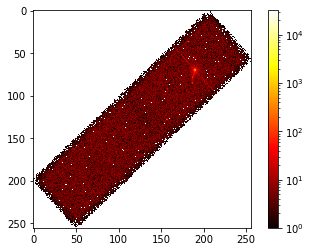

In [101]:
from matplotlib.colors import LogNorm
plt.imshow(image[:][::-1], cmap='hot', norm = LogNorm())
plt.colorbar()
# plt.gca().set_xticks(np.linspace(xCoord.min(), xCoord.max(), 5))

# Spectra


In [13]:
#Assuming no correction for background, and that we do the analysis assuming the background flux as noise, since they are of a order of magnitude lower in comparision

In [11]:
energy.min(), energy.max(), energy.size

(137.97464, 18094.805, 142550)

In [12]:
binSize = 3000
energyPt = np.linspace(energy.min(), energy.max(), binSize)
fluxPt = []
for i in range(binSize-1):
    print(i)
    fluxPt.append(((energy>energyPt[i])&(energy<energyPt[i+1])).sum())
                  
fluxPt = np.array(fluxPt)
fluxError = np.sqrt(fluxPt)
fluxPt = np.append(fluxPt, 0)
fluxError = np.append(fluxError,0)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135
2136
2137
2138


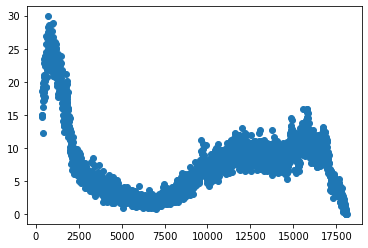

In [13]:
plt.scatter(energyPt[40:], 0.1670*fluxPt[40:])
# plt.errorbar(energyPt[40:], fluxPt[40:], fluxError[40:])

In [17]:
from astropy import units as u

In [18]:
fluxTable = naima.build_data_table(energyPt[40:]*(u.eV), fluxPt[40:]*(0.1670/(u.s*u.eV)), fluxError[40:]*(0.1670/(u.s*u.eV)))
fluxTable

energy,flux,flux_error
eV,1 / (eV s),1 / (eV s)
float64,float64,float64
377.4788752724704,15.030000000000001,1.584301107744358
383.4664811569677,14.696000000000002,1.5665988637810255
389.454087041465,18.537000000000003,1.7594541767264074
395.44169292596234,15.030000000000001,1.584301107744358
401.4292988104596,19.205000000000002,1.7908754842255226
407.41690469495694,12.191,1.4268486254680277
413.4045105794542,17.034000000000002,1.686617324706467
419.39211646395154,19.873,1.8217549231441643


In [19]:
from naima.models import ExponentialCutoffPowerLaw, InverseCompton
# import astropy.units as u
flux_unit = fluxTable['flux'].unit
def cutOffExp(pars, data):
    amplitude = pars[0] * flux_unit
    alpha = pars[1]
    e_cutoff = (10**pars[2])*u.eV
    e_0 = (10**pars[3])*u.eV
    ECPL = ExponentialCutoffPowerLaw(amplitude, 10000*u.eV, alpha, e_cutoff)
    return ECPL(data)

In [20]:
from naima import uniform_prior
def lnprior(pars):
    logprob = naima.uniform_prior(pars[0],0.,np.inf) + naima.uniform_prior(pars[1],-1,5)
    return logprob


In [21]:
p0=np.array((10,2.4,np.log10(15.0),))
labels=['norm','index','log10(cutoff)']

In [ ]:
# sampler,pos = naima.run_sampler(data_table=fluxTable, p0=p0, labels=labels,
# model=cutOffExp, prior=lnprior, nwalkers=64, nburn=100, nrun=20,
# threads=4, prefit=True)

INFO: Finding Maximum Likelihood parameters through Nelder-Mead fitting... [naima.core]
INFO:    Initial parameters: [1.00636184e-19 2.40000000e+00 1.17609126e+00] [naima.core]
INFO:    Initial lnprob(p0): -inf [naima.core]


C:\Users\perve\Anaconda3\lib\site-packages\astropy\units\quantity.py:466: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


Burning in the 64 walkers with 100 steps...


# Series analysis

In [28]:
binSize = 3000
timePt = np.linspace(time.min(), time.max(), binSize)
fluxPt = []
for i in range(binSize-1):
#     print(i)
    fluxPt.append(((time>timePt[i])&(time<timePt[i+1])).sum())
                  
fluxPt = np.array(fluxPt)
fluxPt = np.append(fluxPt, 0)


In [23]:
from stingray import Lightcurve

C:\Users\perve\Anaconda3\lib\site-packages\stingray\crossspectrum.py:21: UserWarning: Using standard scipy fft
  warnings.warn("Using standard scipy fft")


In [78]:
timePt = timePt[:-1]
fluxPt = fluxPt[:-1]

In [30]:
dTime = timePt[1]-timePt[0]
dTime

24.165345430374146

In [79]:
timePt.size, fluxPt.size

(2998, 2998)

In [80]:
lc = Lightcurve(timePt[:-1], fluxPt[:-1], dt = dTime, skip_checks = True)

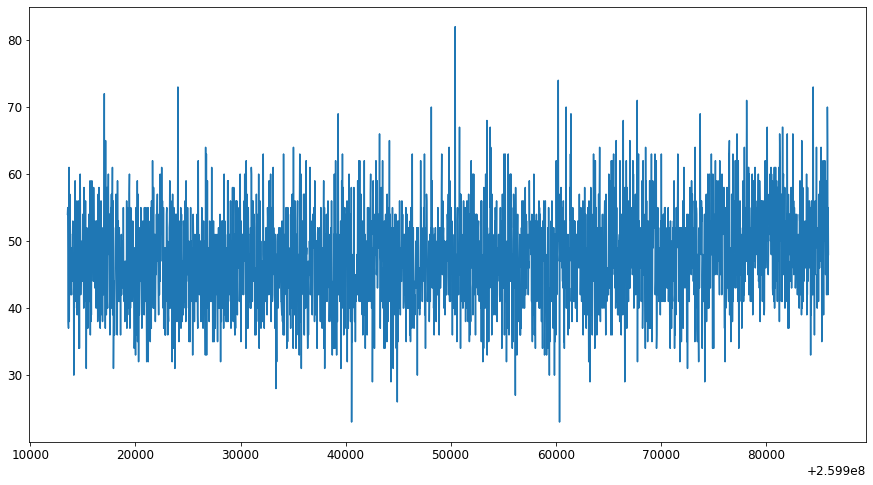

In [76]:
lc.plot()

# RMS intensity diagram

In [81]:
import matplotlib as mpl
import seaborn
mpl.rcParams['figure.figsize']=(15.0,8.0)
mpl.rcParams['font.size']=12                #10
mpl.rcParams['savefig.dpi']=100             #72
from matplotlib import pyplot as plt

import stingray as sr

from stingray import Lightcurve, Powerspectrum, AveragedPowerspectrum, Crossspectrum, AveragedCrossspectrum
from stingray import events
# from stingray.events import EventList
# import glob
import numpy as np
# from astropy.modeling import models, fitting

In [31]:
#To characterise the variability of the source

In [34]:
from stingray.utils import excess_variance

Text(0, 0.5, '$F_{\\rm var}$')

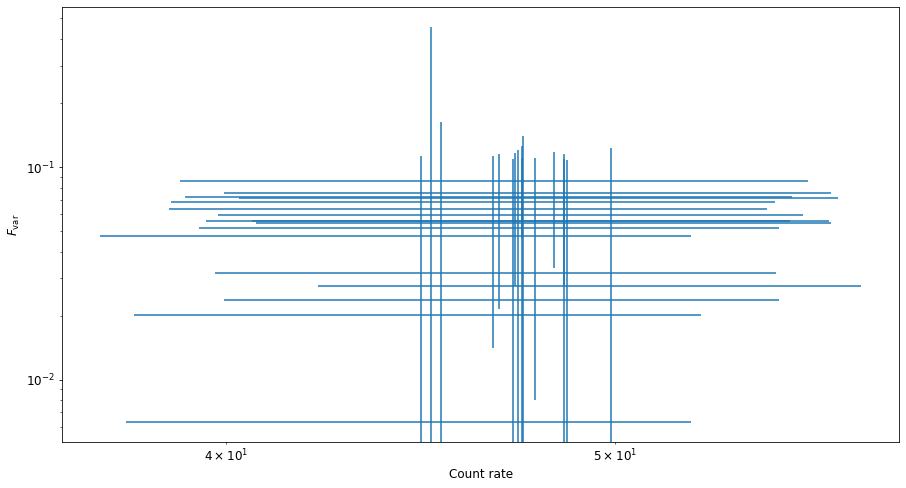

In [83]:
def fvar_fun(lc):
    return excess_variance(lc, normalization='fvar')

def norm_exc_var_fun(lc):
    return excess_variance(lc, normalization='norm_xs')

def exc_var_fun(lc):
    return excess_variance(lc, normalization='none')

def rate_fun(lc):
    return lc.meancounts, np.std(lc.counts)

# lc = Lightcurve(timePt, fluxPt)

start, stop, res = lc.analyze_lc_chunks(1000, np.var)
var = res
# print(start.size, stop.size, var.size)

start, stop, res = lc.analyze_lc_chunks(1000, rate_fun)
rate, rate_err = res

start, stop, res = lc.analyze_lc_chunks(1000, fvar_fun)
fvar, fvar_err = res

start, stop, res = lc.analyze_lc_chunks(1000, exc_var_fun)
evar, evar_err = res

start, stop, res = lc.analyze_lc_chunks(1000, norm_exc_var_fun)
nvar, nvar_err = res

plt.errorbar(rate, fvar, xerr=rate_err, yerr=fvar_err, fmt='none')
plt.loglog()
plt.xlabel('Count rate')
plt.ylabel(r'$F_{\rm var}$')

In [84]:
tmean = (start + stop)/2

Text(0, 0.5, 'Counts')

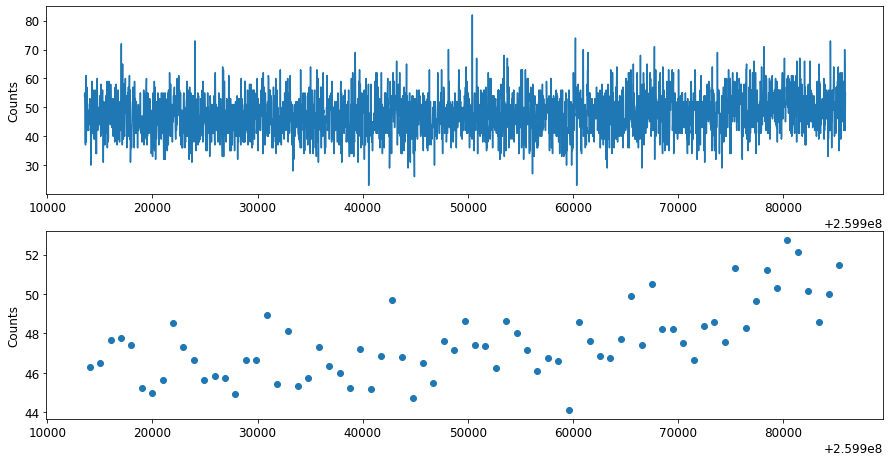

In [107]:
from matplotlib.gridspec import GridSpec
plt.figure(figsize=(15, 20))
gs = GridSpec(5, 1)
ax_lc = plt.subplot(gs[0])
ax_mean = plt.subplot(gs[1], sharex=ax_lc)
# ax_evar = plt.subplot(gs[2], sharex=ax_lc)
# ax_nvar = plt.subplot(gs[3], sharex=ax_lc)
# ax_fvar = plt.subplot(gs[4], sharex=ax_lc)

ax_lc.plot(lc.time, lc.counts)
ax_lc.set_ylabel('Counts')
ax_mean.scatter(tmean, rate)
ax_mean.set_ylabel('Counts')

# ax_evar.errorbar(tmean, evar, yerr=evar_err, fmt='o')
# ax_evar.set_ylabel(r'$\sigma_{XS}$')

# ax_fvar.errorbar(tmean, fvar, yerr=fvar_err, fmt='o')
# ax_fvar.set_ylabel(r'$F_{var}$')

# ax_nvar.errorbar(tmean, nvar, yerr=nvar_err, fmt='o')
# ax_nvar.set_ylabel(r'$\sigma_{NXS}$')

In [45]:
lc = Lightcurve(tmean, rate)

# Power spectrum

In [70]:
energy, time

(array([12066.586  ,   306.5475 ,   479.92664, ..., 13801.64   ,
        17506.143  , 16250.781  ], dtype=float32),
 array([2.59913530e+08, 2.59913530e+08, 2.59913530e+08, ...,
        2.59986002e+08, 2.59986002e+08, 2.59986002e+08]))

In [87]:
energy.size, time.size

(142550, 142550)

In [89]:
energy.min(), energy.max(), time.min()-time.max()

(137.97464, 18094.805, -72471.87096378207)

In [90]:
def generateDynamicSpectrum(energyBin, timeBin, energy, time):
    imageArray = []
    energyBinned = np.linspace(energy.min(), energy.max(), energyBin+1)
    timeBinned = np.linspace(time.min(), time.max(), timeBin+1)
    energyBinned = np.array(energyBinned)
    timeBinned = np.array(timeBinned)
     
    for j in range(len(timeBinned)-1):
        imageX = []
        for i in range(len(energyBinned)-1):
            imageX.append(((energy<energyBinned[i+1])&(energy>energyBinned[i])&(time<timeBinned[j+1])&(time>timeBinned[j])).sum())
            print(i, j)
        imageArray.append(imageX)
    return imageArray

In [91]:
dynamicSpectrum = generateDynamicSpectrum(256, 256, energy, time)

0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 0
15 0
16 0
17 0
18 0
19 0
20 0
21 0
22 0
23 0
24 0
25 0
26 0
27 0
28 0
29 0
30 0
31 0
32 0
33 0
34 0
35 0
36 0
37 0
38 0
39 0
40 0
41 0
42 0
43 0
44 0
45 0
46 0
47 0
48 0
49 0
50 0
51 0
52 0
53 0
54 0
55 0
56 0
57 0
58 0
59 0
60 0
61 0
62 0
63 0
64 0
65 0
66 0
67 0
68 0
69 0
70 0
71 0
72 0
73 0
74 0
75 0
76 0
77 0
78 0
79 0
80 0
81 0
82 0
83 0
84 0
85 0
86 0
87 0
88 0
89 0
90 0
91 0
92 0
93 0
94 0
95 0
96 0
97 0
98 0
99 0
100 0
101 0
102 0
103 0
104 0
105 0
106 0
107 0
108 0
109 0
110 0
111 0
112 0
113 0
114 0
115 0
116 0
117 0
118 0
119 0
120 0
121 0
122 0
123 0
124 0
125 0
126 0
127 0
128 0
129 0
130 0
131 0
132 0
133 0
134 0
135 0
136 0
137 0
138 0
139 0
140 0
141 0
142 0
143 0
144 0
145 0
146 0
147 0
148 0
149 0
150 0
151 0
152 0
153 0
154 0
155 0
156 0
157 0
158 0
159 0
160 0
161 0
162 0
163 0
164 0
165 0
166 0
167 0
168 0
169 0
170 0
171 0
172 0
173 0
174 0
175 0
176 0
177 0
178 0
179 0
180 0
181 0
182 0
183 0
184 0


195 11
196 11
197 11
198 11
199 11
200 11
201 11
202 11
203 11
204 11
230 11
231 11
232 11
233 11
234 11
235 11
236 11
237 11
238 11
239 11
240 11
241 11
242 11
243 11
244 11
245 11
246 11
247 11
248 11
249 11
250 11
251 11
252 11
253 11
254 11
255 11
0 12
1 12
2 12
3 12
4 12
5 12
6 12
7 12
8 12
9 12
10 12
11 12
12 12
13 12
14 12
15 12
16 12
17 12
18 12
19 12
20 12
21 12
22 12
23 12
24 12
25 12
26 12
27 12
28 12
29 12
30 12
31 12
32 12
33 12
34 12
35 12
36 12
37 12
38 12
39 12
40 12
41 12
42 12
43 12
44 12
45 12
46 12
47 12
48 12
49 12
50 12
51 12
52 12
53 12
54 12
55 12
56 12
57 12
58 12
59 12
60 12
61 12
62 12
63 12
64 12
65 12
66 12
67 12
68 12
69 12
70 12
71 12
72 12
73 12
74 12
75 12
76 12
77 12
78 12
79 12
80 12
81 12
82 12
83 12
84 12
85 12
86 12
87 12
88 12
89 12
90 12
91 12
92 12
93 12
94 12
95 12
96 12
97 12
98 12
116 12
117 12
118 12
119 12
120 12
121 12
122 12
123 12
124 12
125 12
126 12
127 12
128 12
129 12
130 12
131 12
132 12
133 12
134 12
135 12
136 12
137 12
138 12
139

7 22
8 22
9 22
10 22
11 22
12 22
13 22
14 22
15 22
16 22
17 22
18 22
19 22
20 22
21 22
22 22
23 22
24 22
25 22
26 22
27 22
28 22
29 22
30 22
31 22
32 22
33 22
34 22
35 22
36 22
37 22
38 22
39 22
40 22
41 22
42 22
43 22
44 22
45 22
46 22
47 22
48 22
49 22
50 22
51 22
52 22
53 22
54 22
55 22
56 22
57 22
58 22
59 22
60 22
61 22
62 22
63 22
64 22
65 22
66 22
67 22
68 22
69 22
70 22
71 22
72 22
73 22
74 22
75 22
76 22
77 22
78 22
79 22
80 22
81 22
82 22
83 22
84 22
85 22
86 22
87 22
88 22
89 22
90 22
91 22
92 22
93 22
94 22
95 22
96 22
97 22
98 22
99 22
100 22
101 22
102 22
103 22
104 22
105 22
106 22
107 22
108 22
109 22
110 22
111 22
112 22
113 22
114 22
115 22
116 22
117 22
118 22
119 22
120 22
121 22
122 22
123 22
124 22
125 22
126 22
127 22
128 22
129 22
130 22
131 22
132 22
133 22
134 22
135 22
136 22
137 22
138 22
139 22
140 22
141 22
142 22
143 22
144 22
145 22
146 22
147 22
148 22
149 22
150 22
151 22
152 22
153 22
154 22
155 22
156 22
157 22
158 22
159 22
160 22
161 22
162 22
163 

230 26
231 26
232 26
233 26
234 26
235 26
236 26
237 26
238 26
239 26
240 26
241 26
242 26
243 26
244 26
245 26
246 26
247 26
248 26
249 26
250 26
251 26
252 26
253 26
254 26
255 26
0 27
1 27
2 27
3 27
4 27
5 27
6 27
7 27
8 27
9 27
10 27
11 27
12 27
13 27
14 27
15 27
16 27
17 27
18 27
19 27
20 27
21 27
22 27
23 27
24 27
25 27
26 27
27 27
28 27
29 27
30 27
31 27
32 27
33 27
34 27
35 27
36 27
37 27
38 27
39 27
40 27
41 27
42 27
43 27
44 27
45 27
46 27
47 27
48 27
49 27
50 27
51 27
52 27
53 27
54 27
55 27
56 27
57 27
58 27
59 27
60 27
61 27
62 27
63 27
64 27
65 27
66 27
67 27
68 27
69 27
70 27
71 27
72 27
73 27
74 27
75 27
76 27
77 27
78 27
79 27
80 27
81 27
82 27
83 27
84 27
85 27
86 27
87 27
88 27
89 27
90 27
91 27
92 27
93 27
94 27
95 27
96 27
97 27
98 27
99 27
100 27
101 27
102 27
103 27
104 27
105 27
106 27
107 27
108 27
109 27
110 27
111 27
112 27
113 27
114 27
115 27
116 27
117 27
118 27
119 27
120 27
121 27
122 27
123 27
124 27
125 27
126 27
127 27
128 27
129 27
130 27
131 27
132 

178 37
179 37
180 37
181 37
182 37
183 37
184 37
185 37
186 37
187 37
188 37
189 37
190 37
191 37
192 37
193 37
194 37
195 37
196 37
197 37
198 37
199 37
200 37
201 37
202 37
203 37
204 37
205 37
206 37
207 37
37
233 37
234 37
235 37
236 37
237 37
238 37
239 37
240 37
241 37
242 37
243 37
244 37
245 37
246 37
247 37
248 37
249 37
250 37
251 37
252 37
253 37
254 37
255 37
0 38
1 38
2 38
3 38
4 38
5 38
6 38
7 38
8 38
9 38
10 38
11 38
12 38
13 38
14 38
15 38
16 38
17 38
18 38
19 38
20 38
21 38
22 38
23 38
24 38
25 38
26 38
27 38
28 38
29 38
30 38
31 38
32 38
33 38
34 38
35 38
36 38
37 38
38 38
39 38
40 38
41 38
42 38
43 38
44 38
45 38
46 38
47 38
48 38
49 38
50 38
51 38
52 38
53 38
54 38
55 38
56 38
57 38
58 38
59 38
60 38
61 38
62 38
63 38
64 38
65 38
66 38
67 38
68 38
69 38
70 38
71 38
72 38
73 38
74 38
75 38
76 38
77 38
78 38
79 38
80 38
81 38
82 38
83 38
84 38
85 38
86 38
87 38
88 38
89 38
90 38
91 38
92 38
93 38
94 38
95 38
96 38
97 38
98 38
99 38
100 38
101 38
102 38
103 38
104 38
1

167 49
168 49
169 49
170 49
171 49
172 49
173 49
174 49
175 49
176 49
177 49
178 49
179 49
180 49
181 49
182 49
183 49
184 49
185 49
186 49
187 49
188 49
189 49
190 49
191 49
192 49
193 49
194 49
195 49
196 49
197 49
198 49
199 49
200 49
201 49
202 49
203 49
204 49
205 49
206 49
207 49
208 49
209 49
210 49
211 4910 50
11 50
12 50
13 50
14 50
15 50
16 50
17 50
18 50
19 50
20 50
21 50
22 50
23 50
24 50
25 50
26 50
27 50
28 50
29 50
30 50
31 50
32 50
33 50
34 50
35 50
36 50
37 50
38 50
39 50
40 50
41 50
42 50
43 50
44 50
45 50
46 50
47 50
48 50
49 50
50 50
51 50
52 50
53 50
54 50
55 50
56 50
57 50
58 50
59 50
60 50
61 50
62 50
63 50
64 50
65 50
66 50
67 50
68 50
69 50
70 50
71 50
72 50
73 50
74 50
75 50
76 50
77 50
78 50
79 50
80 50
81 50
82 50
83 50
84 50
85 50
86 50
87 50
88 50
89 50
90 50
91 50
92 50
93 50
94 50
95 50
96 50
97 50
98 50
99 50
100 50
101 50
102 50
103 50
104 50
105 50
106 50
107 50
108 50
109 50
110 50
111 50
112 50
113 50
114 50
115 50
116 50
117 50
118 50
119 50
120 50

97 61
98 61
99 61
100 61
101 61
102 61
103 61
104 61
105 61
106 61
107 61
108 61
109 61
110 61
111 61
112 61
113 61
114 61
115 61
116 61
117 61
118 61
119 61
120 61
121 61
122 61
123 61
124 61
125 61
126 61
127 61
128 61
129 61
130 61
131 61
132 61
133 61
134 61
135 61
136 61
137 61
138 61
139 61
140 61
141 61
142 61
143 61
144 61
145 61
146 61
147 61
148 61
149 61
150 61
151 61
152 61
165 61
166 61
167 61
168 61
169 61
170 61
171 61
172 61
173 61
174 61
175 61
176 61
177 61
178 61
179 61
180 61
181 61
182 61
183 61
184 61
185 61
186 61
187 61
188 61
189 61
190 61
191 61
192 61
193 61
194 61
195 61
196 61
197 61
198 61
199 61
200 61
201 61
202 61
203 61
204 61
205 61
206 61
207 61
208 61
209 61
210 61
211 61
212 61
213 61
214 61
215 61
216 61
217 61
218 61
219 61
220 61
221 61
222 61
223 61
224 61
225 61
226 61
227 61
228 61
229 61
230 61
231 61
232 61
233 61
234 61
235 61
236 61
237 61
238 61
239 61
240 61
241 61
242 61
243 61
244 61
245 61
246 61
247 61
248 61
249 61
250 61
251 61
25

239 66
240 66
241 66
242 66
243 66
244 66
245 66
246 66
247 66
248 66
249 66
250 66
251 66
252 66
253 66
254 66
255 66
0 67
1 67
2 67
3 67
4 67
5 67
6 67
7 67
8 67
9 67
10 67
11 67
12 67
13 67
14 67
15 67
16 67
17 67
18 67
19 67
20 67
21 67
22 67
23 67
24 67
25 67
26 67
27 67
28 67
29 67
30 67
31 67
32 67
33 67
34 67
35 67
36 67
37 67
38 67
39 67
40 67
41 67
42 67
43 67
44 67
45 67
46 67
47 67
48 67
49 67
50 67
51 67
52 67
53 67
54 67
55 67
56 67
57 67
 67
254 67
255 67
0 68
1 68
2 68
3 68
4 68
5 68
6 68
7 68
8 68
9 68
10 68
11 68
12 68
13 68
14 68
15 68
16 68
17 68
18 68
19 68
20 68
21 68
22 68
23 68
24 68
25 68
26 68
27 68
28 68
29 68
30 68
31 68
32 68
33 68
34 68
35 68
36 68
37 68
38 68
39 68
40 68
41 68
42 68
43 68
44 68
45 68
46 68
47 68
48 68
49 68
50 68
51 68
52 68
53 68
54 68
55 68
56 68
57 68
58 68
59 68
60 68
61 68
62 68
63 68
64 68
65 68
66 68
67 68
68 68
69 68
70 68
71 68
72 68
73 68
74 68
75 68
76 68
77 68
78 68
79 68
80 68
81 68
82 68
83 68
84 68
85 68
86 68
87 68
88 68
8

11 79
12 79
13 79
14 79
15 79
16 79
17 79
18 79
19 79
20 79
21 79
22 79
23 79
24 79
25 79
26 79
27 79
28 79
29 79
30 79
31 79
32 79
33 79
34 79
35 79
36 79
37 79
38 79
39 79
40 79
41 79
42 79
43 79
44 79
45 79
46 79
47 79
48 79
49 79
50 79
51 79
52 79
53 79
54 79
55 79
56 79
57 79
58 79
59 79
60 79
61 79
62 79
63 79
64 79
65 79
66 79
67 79
68 79
69 79
70 79
71 79
72 79
73 79
74 79
75 79
76 79
77 79
78 79
79 79
80 79
81 79
82 79
83 79
84 79
85 79
86 79
87 79
88 79
89 79
90 79
91 79
92 79
93 79
94 79
95 79
96 79
97 79
98 79
99 79
100 79
101 79
102 79
103 79
104 79
105 79
106 79
107 79
108 79
109 79
110 79
111 79
112 79
113 79
114 79
115 79
116 79
117 79
118 79
119 79
120 79
121 79
122 79
123 79
124 79
125 79
126 79
127 79
128 79
129 79
130 79
131 79
132 79
133 79
134 79
135 79
136 79
137 79
138 79
139 79
140 79
141 79
142 79
143 79
144 79
145 79
146 79
147 79
148 79
149 79
150 79
151 79
152 79
153 79
154 79
155 79
156 79
157 79
158 79
159 79
160 79
161 79
162 79
163 79
164 79
165 79
166 

148 91
149 91
150 91
151 91
152 91
153 91
154 91
155 91
156 91
157 91
158 91
159 91
160 91
161 91
162 91
163 91
164 91
165 91
166 91
167 91
168 91
169 91
170 91
171 91
172 91
173 91
174 91
175 91
176 91
177 91
178 91
179 91
180 91
181 91
182 91
183 91
184 91
185 91
186 91
187 91
188 91
189 91
190 91
191 91
192 91
193 91
194 91
195 91
196 91
197 91
198 91
199 91
200 91
201 91
202 91
203 91
204 91
205 91
206 91
207 91
208 91
209 91
210 91
211 91
212 91
213 91
214 91
215 91
216 91
217 91
218 91
219 91
220 91
221 91
222 91
223 91
224 91
225 91
226 91
227 91
228 91
229 91
230 91
231 91
232 91
233 91
234 91
235 91
236 91
237 91
238 91
239 91
240 91
241 91
242 91
243 91
244 91
245 91
246 91
247 91
248 91
249 91
250 91
251 91
252 91
253 91
254 91
255 91
0 92
1 92
2 92
3 92
4 92
5 92
6 92
7 92
8 92
9 92
10 92
11 92
12 92
13 92
14 92
15 92
16 92
17 92
18 92
19 92
20 92
21 92
22 92
23 92
24 92
25 92
26 92
27 92
28 92
29 92
30 92
31 92
32 92
33 92
34 92
35 92
36 92
37 92
38 92
39 92
40 92
41 92
42

89 102
90 102
91 102
92 102
93 102
94 102
95 102
96 102
97 102
98 102
99 102
100 102
101 102
102 102
103 102
104 102
105 102
106 102
107 102
108 102
109 102
110 102
111 102
112 102
113 102
114 102
115 102
116 102
117 102
118 102
119 102
120 102
121 102
122 102
123 102
124 102
125 102
126 102
127 102
128 102
129 102
130 102
131 102
132 102
133 102
134 102
135 102
136 102
137 102
138 102
139 102
140 102
146 102
147 102
148 102
149 102
150 102
151 102
152 102
153 102
154 102
155 102
156 102
157 102
158 102
159 102
160 102
161 102
162 102
163 102
164 102
165 102
166 102
167 102
168 102
169 102
170 102
171 102
172 102
173 102
174 102
175 102
176 102
177 102
178 102
179 102
180 102
181 102
182 102
183 102
184 102
185 102
186 102
187 102
188 102
189 102
190 102
191 102
192 102
193 102
194 102
195 102
196 102
197 102
198 102
199 102
200 102
201 102
202 102
203 102
204 102
205 102
206 102
207 102
208 102
209 102
210 102
211 102
212 102
213 102
214 102
215 102
216 102
217 102
218 102
219 102
220

191 111
192 111
193 111
194 111
195 111
196 111
197 111
198 111
199 111
200 111
201 111
202 111
203 111
204 111
205 111
206 111
207 111
208 111
209 111
210 111
211 111
212 111
213 111
214 111
215 111
216 111
217 111
218 111
219 111
220 111
221 111
222 111
223 111
224 111
225 111
226 111
227 111
228 111
229 111
230 111
231 111
232 111
233 111
234 111
235 111
236 111
237 111
238 111
239 111
240 111
241 111
242 111
243 111
244 111
245 111
246 111
247 111
248 111
249 111
250 111
251 111
252 111
253 111
254 111
255 111
0 112
1 112
2 112
3 112
4 112
5 112
6 112
7 112
8 112
9 112
10 112
11 112
12 112
13 112
14 112
15 112
16 112
17 112
18 112
19 112
20 112
21 112
22 112
23 112
24 112
25 112
26 112
27 112
28 112
29 112
30 112
31 112
32 112
33 112
34 112
35 112
36 112
37 112
38 112
39 112
40 112
41 112
42 112
43 112
44 112
45 112
46 112
47 112
48 112
49 112
50 112
51 112
52 112
53 112
54 112
55 112
56 112
57 112
58 112
59 112
60 112
61 112
62 112
63 112
64 112
65 112
66 112
67 112
68 112
69 112


201 120
202 120
203 120
204 120
205 120
206 120
207 120
208 120
209 120
210 120
211 120
212 120
213 120
214 120
215 120
216 120
217 120
218 120
219 120
220 120
221 120
222 120
223 120
224 120
225 120
226 120
227 120
228 120
229 120
230 120
231 120
232 120
233 120
234 120
235 120
236 120
237 120
238 120
239 120
240 120
241 120
242 120
243 120
244 120
245 120
246 120
247 120
248 120
249 120
250 120
251 120
252 120
253 120
254 120
255 120
0 121
1 121
2 121
3 121
4 121
5 121
6 121
7 121
8 121
9 121
10 121
11 121
12 121
13 121
14 121
15 121
16 121
17 121
18 121
19 121
20 121
21 121
22 121
23 121
24 121
25 121
26 121
27 121
28 121
29 121
30 121
31 121
32 121
33 121
34 121
35 121
36 121
37 121
38 121
39 121
40 121
41 121
42 121
43 121
44 121
45 121
46 121
47 121
48 121
49 121
50 121
51 121
52 121
53 121
54 121
55 121
56 121
57 121
58 121
59 121
60 121
61 121
62 121
63 121
64 121
65 121
66 121
67 121
68 121
69 121
70 121
71 121
72 121
73 121
74 121
75 121
76 121
77 121
78 121
79 121
80 121
81 

19 130
20 130
21 130
22 130
23 130
24 130
25 130
26 130
27 130
28 130
29 130
30 130
31 130
32 130
33 130
34 130
35 130
36 130
37 130
38 130
39 130
40 130
41 130
42 130
43 130
44 130
45 130
46 130
47 130
48 130
49 130
50 130
51 130
52 130
53 130
54 130
55 130
56 130
57 130
58 130
59 130
60 130
61 130
62 130
63 130
64 130
65 130
66 130
67 130
68 130
69 130
70 130
71 130
72 130
73 130
74 130
75 130
76 130
77 130
78 130
79 130
80 130
81 130
82 130
83 130
84 130
85 130
86 130
87 130
88 130
89 130
90 130
91 130
92 130
93 130
94 130
95 130
96 130
97 130
98 130
99 130
100 130
101 130
102 130
103 130
104 130
105 130
106 130
107 130
108 130
109 130
110 130
111 130
112 130
113 130
114 130
115 130
116 130
117 130
118 130
119 130
120 130
121 130
122 130
123 130
124 130
125 130
126 130
127 130
128 130
129 130
130 130
131 130
132 130
133 130
134 130
135 130
136 130
137 130
138 130
139 130
140 130
141 130
142 130
143 130
144 130
145 130
146 130
147 130
148 130
149 130
150 130
151 130
152 130
153 130
1

226 140
227 140
228 140
229 140
230 140
231 140
232 140
233 140
234 140
235 140
236 140
237 140
238 140
239 140
240 140
241 140
242 140
243 140
244 140
245 140
246 140
247 140
248 140
249 140
250 140
251 140
252 140
253 140
254 140
255 140
0 141
1 141
2 141
3 141
4 141
5 141
6 141
7 141
8 141
9 141
10 141
11 141
12 141
13 141
14 141
15 141
16 141
17 141
18 141
19 141
20 141
21 141
22 141
23 141
24 141
25 141
26 141
27 141
28 141
29 141
30 141
31 141
32 141
33 141
34 141
35 141
36 141
37 141
38 141
39 141
40 141
41 141
42 141
43 141
44 141
45 141
46 141
47 141
48 141
49 141
50 141
51 141
52 141
53 141
54 141
55 141
56 141
57 141
58 141
59 141
60 141
61 141
62 141
63 141
64 141
65 141
66 141
67 141
68 141
69 141
70 141
71 141
72 141
73 141
74 141
75 141
76 141
77 141
78 141
79 141
80 141
81 141
82 141
83 141
84 141
85 141
86 141
87 141
88 141
89 141
90 141
91 141
92 141
93 141
94 141
95 141
96 141
97 141
98 141
99 141
100 141
101 141
102 141
103 141
104 141
105 141
106 141
107 141
108 14

152 149
153 149
154 149
155 149
156 149
157 149
158 149
159 149
160 149
161 149
162 149
163 149
164 149
165 149
166 149
167 149
168 149
169 149
170 149
171 149
172 149
173 149
174 149
175 149
176 149
177 149
178 149
179 149
180 149
181 149
182 149
183 149
184 149
185 149
186 149
187 149
188 149
189 149
190 149
191 149
192 149
193 149
194 149
195 149
196 149
197 149
198 149
199 149
200 149
201 149
202 149
203 149
204 149
205 149
206 149
207 149
208 149
209 149
210 149
211 149
212 149
213 149
214 149
215 149
216 149
217 149
218 149
219 149
220 149
221 149
222 149
223 149
224 149
225 149
226 149
227 149
228 149
229 149
230 149
231 149
232 149
233 149
234 149
235 149
236 149
237 149
238 149
239 149
240 149
241 149
242 149
243 149
244 149
245 149
246 149
247 149
248 149
249 149
250 149
251 149
252 149
253 149
254 149
255 149
0 150
1 150
2 150
3 150
4 150
153 150
154 150
155 150
156 150
157 150
158 150
159 150
160 150
161 150
162 150
163 150
164 150
165 150
166 150
167 150
168 150
169 150
17

254 158
255 158
0 159
1 159
2 159
3 159
4 159
5 159
6 159
7 159
8 159
9 159
10 159
11 159
12 159
13 159
14 159
15 159
16 159
17 159
18 159
19 159
20 159
21 159
22 159
23 159
24 159
25 159
26 159
27 159
28 159
29 159
30 159
31 159
32 159
33 159
34 159
35 159
36 159
37 159
38 159
39 159
40 159
41 159
42 159
43 159
44 159
45 159
46 159
47 159
48 159
49 159
50 159
51 159
52 159
53 159
54 159
55 159
56 159
57 159
58 159
59 159
60 159
61 159
62 159
63 159
64 159
65 159
66 159
67 159
68 159
69 159
70 159
71 159
72 159
73 159
74 159
75 159
76 159
77 159
78 159
79 159
80 159
81 159
82 159
83 159
84 159
85 159
86 159
87 159
88 159
89 159
90 159
91 159
92 159
93 159
94 159
95 159
96 159
97 159
98 159
99 159
100 159
101 159
102 159
103 159
104 159
105 159
106 159
107 159
108 159
109 159
110 159
111 159
112 159
113 159
114 159
115 159
116 159
117 159
118 159
119 159
120 159
121 159
122 159
123 159
124 159
125 159
126 159
127 159
128 159
129 159
130 159
131 159
132 159
133 159
134 159
135 159
136 15

104 168
105 168
106 168
107 168
108 168
109 168
110 168
111 168
112 168
113 168
114 168
115 168
116 168
117 168
118 168
119 168
120 168
121 168
122 168
123 168
124 168
125 168
126 168
127 168
128 168
129 168
130 168
131 168
132 168
133 168
134 168
135 168
136 168
137 168
138 168
139 168
140 168
141 168
142 168
143 168
144 168
145 168
146 168
147 168
148 168
149 168
150 168
151 168
152 168
153 168
154 168
155 168
156 168
157 168
158 168
159 168
160 168
161 168
162 168
163 168
164 168
165 168
166 168
167 168
168 168
169 168
170 168
171 168
172 168
173 168
174 168
175 168
176 168
177 168
178 168
179 168
180 168
181 168
182 168
183 168
184 168
185 168
186 168
187 168
188 168
189 168
190 168
191 168
192 168
193 168
194 168
195 168
196 168
197 168
198 168
199 168
200 168
201 168
202 168
203 168
204 168
205 168
206 168
207 168
208 168
209 168
210 168
211 168
212 168
213 168
214 168
215 168
216 168
217 168
218 168
219 168
220 168
221 168
222 168
223 168
224 168
225 168
226 168
227 168
228 168


45 178
46 178
47 178
48 178
49 178
50 178
51 178
52 178
53 178
54 178
55 178
56 178
57 178
58 178
59 178
60 178
61 178
62 178
63 178
64 178
65 178
66 178
67 178
68 178
69 178
70 178
71 178
72 178
73 178
74 178
75 178
76 178
77 178
78 178
79 178
80 178
81 178
82 178
83 178
84 178
85 178
86 178
87 178
88 178
89 178
90 178
91 178
92 178
93 178
94 178
95 178
96 178
97 178
98 178
99 178
100 178
101 178
102 178
103 178
104 178
105 178
106 178
107 178
108 178
109 178
110 178
111 178
112 178
113 178
114 178
115 178
116 178
117 178
118 178
119 178
120 178
121 178
122 178
123 178
124 178
125 178
126 178
127 178
128 178
129 178
130 178
131 178
132 178
133 178
134 178
135 178
136 178
137 178
138 178
139 178
140 178
141 178
142 178
143 178
144 178
145 178
146 178
147 178
148 178
149 178
150 178
151 178
152 178
153 178
154 178
155 178
156 178
157 178
158 178
159 178
160 178
161 178
162 178
163 178
164 178
165 178
166174 178
175 178
176 178
177 178
178 178
179 178
180 178
181 178
182 178
183 178
184 

57 188
58 188
59 188
60 188
61 188
62 188
63 188
64 188
65 188
66 188
67 188
68 188
69 188
70 188
71 188
72 188
73 188
74 188
75 188
76 188
77 188
78 188
79 188
80 188
81 188
82 188
83 188
84 188
85 188
86 188
87 188
88 188
89 188
90 188
91 188
92 188
93 188
94 188
95 188
96 188
97 188
98 188
99 188
100 188
101 188
102 188
103 188
104 188
105 188
106 188
107 188
108 188
109 188
110 188
111 188
112 188
113 188
114 188
115 188
116 188
117 188
118 188
119 188
120 188
121 188
122 188
123 188
124 188
125 188
126 188
127 188
128 188
129 188
130 188
131 188
132 188
133 188
134 188
135 188
136 188
137 188
83 189
84 189
85 189
86 189
87 189
88 189
89 189
90 189
91 189
92 189
93 189
94 189
95 189
96 189
97 189
98 189
99 189
100 189
101 189
102 189
103 189
104 189
105 189
106 189
107 189
108 189
109 189
110 189
111 189
112 189
113 189
114 189
115 189
116 189
117 189
118 189
119 189
120 189
121 189
122 189
123 189
124 189
125 189
126 189
127 189
128 189
129 189
130 189
131 189
132 189
133 189
134 

191 197
192 197
193 197
194 197
195 197
196 197
197 197
198 197
199 197
200 197
201 197
202 197
203 197
204 197
205 197
206 197
207 197
208 197
209 197
210 197
211 197
212 197
213 197
214 197
215 197
216 197
217 197
218 197
219 197
220 197
221 197
222 197
223 197
224 197
225 197
226 197
227 197
228 197
229 197
230 197
231 197
232 197
233 197
234 197
235 197
236 197
237 197
238 197
239 197
240 197
241 197
242 197
243 197
244 197
245 197
246 197
247 197
248 197
249 197
250 197
251 197
252 197
253 197
254 197
255 197
0 198
1 198
2 198
3 198
4 198
5 198
6 198
7 198
8 198
9 198
10 198
11 198
12 198
13 198
14 198
15 198
16 198
17 198
18 198
19 198
20 198
21 198
22 198
23 198
24 198
25 198
26 198
27 198
28 198
29 198
30 198
31 198
32 198
33 198
34 198
35 198
36 198
37 198
38 198
39 198
40 198
41 198
42 198
43 198
44 198
45 198
46 198
47 198
48 198
49 198
50 198
51 198
52 198
53 198
54 198
55 198
56 198
57 198
58 198
59 198
60 198
61 198
62 198
63 198
64 198
65 198
66 198
67 198
68 198
69 198


216 207
217 207
218 207
219 207
220 207
221 207
222 207
223 207
224 207
225 207
226 207
227 207
228 207
229 207
230 207
231 207
232 207
233 207
234 207
235 207
236 207
237 207
238 207
239 207
240 207
241 207
242 207
243 207
244 207
245 207
246 207
247 207
248 207
249 207
250 207
251 207
252 207
253 207
254 207
255 207
0 208
1 208
2 208
3 208
4 208
5 208
6 208
7 208
8 208
9 208
10 208
11 208
12 208
13 208
14 208
15 208
16 208
17 208
18 208
19 208
20 208
21 208
22 208
23 208
24 208
25 208
26 208
27 208
28 208
29 208
30 208
31 208
32 208
33 208
34 208
35 208
36 208
37 208
38 208
39 208
40 208
41 208
42 208
43 208
44 208
45 208
46 208
47 208
48 208
49 208
50 208
51 208
52 208
53 208
54 208
55 208
56 208
57 208
58 208
59 208
60 208
61 208
62 208
63 208
64 208
65 208
66 208
67 208
68 208
69 208
70 208
71 208
72 208
73 208
74 208
75 208
76 208
77 208
78 208
79 208
80 208
81 208
82 208
83 208
84 208
85 208
86 208
87 208
88 208
89 208
90 208
91 208
92 208
93 208
94 208
95 208
96 208
97 208
98 2

51 218
52 218
53 218
54 218
55 218
56 218
57 218
58 218
59 218
60 218
61 218
62 218
63 218
64 218
65 218
66 218
67 218
68 218
69 218
70 218
71 218
72 218
73 218
74 218
75 218
76 218
77 218
78 218
79 218
80 218
81 218
82 218
83 218
84 218
85 218
86 218
87 218
88 218
89 218
90 218
91 218
92 218
93 218
94 218
95 218
96 218
97 218
98 218
99 218
100 218
101 218
102 218
103 218
104 218
105 218
106 218
107 218
108 218
109 218
110 218
111 218
112 218
113 218
114 218
115 218
116 218
117 218
118 218
119 218
120 218
121 218
122 218
123 218
124 218
125 218
126 218
127 218
128 218
129 218
130 218
131 218
132 218
133 218
134 218
135 218
136 218
137 218
138 218
153 218
154 218
155 218
156 218
157 218
158 218
159 218
160 218
161 218
162 218
163 218
164 218
165 218
166 218
167 218
168 218
169 218
170 218
171 218
172 218
173 218
174 218
175 218
176 218
177 218
178 218
179 218
180 218
181 218
182 218
183 218
184 218
185 218
186 218
187 218
188 218
189 218
190 218
191 218
192 218
193 218
194 218
195 218
1

197 227
198 227
199 227
200 227
201 227
202 227
203 227
204 227
205 227
206 227
207 227
208 227
209 227
210 227
211 227
212 227
213 227
214 227
215 227
216 227
217 227
218 227
219 227
220 227
221 227
222 227
223 227
224 227
225 227
226 227
227 227
228 227
229 227
230 227
231 227
232 227
233 227
234 227
235 227
236 227
237 227
238 227
239 227
240 227
241 227
242 227
243 227
244 227
245 227
246 227
247 227
248 227
249 227
250 227
251 227
252 227
253 227
254 227
255 227
0 228
1 228
2 228
3 228
4 228
5 228
6 228
7 228
8 228
9 228
10 228
11 228
12 228
13 228
14 228
15 228
16 228
17 228
18 228
19 228
20 228
21 228
22 228
23 228
24 228
25 228
26 228
27 228
28 228
29 228
30 228
31 228
32 228
33 228
34 228
35 228
36 228
37 228
38 228
39 228
40 228
41 228
42 228
43 228
44 228
45 228
46 228
47 228
48 228
49 228
50 228
51 228
52 228
53 228
54 228
55 228
56 228
57 228
58 228
59 228
60 228
61 228
62 228
63 228
64 228
65 228
66 228
67 228
68 228
69 228
70 228
71 228
72 228
73 228
74 228
75 228
76 228

113 237
114 237
115 237
116 237
117 237
118 237
119 237
120 237
121 237
122 237
123 237
124 237
125 237
126 237
127 237
128 237
129 237
130 237
131 237
132 237
133 237
134 237
135 237
136 237
137 237
138 237
139 237
140 237
141 237
142 237
143 237
144 237
145 237
146 237
147 237
148 237
149 237
150 237
151 237
152 237
153 237
154 237
155 237
156 237
157 237
158 237
159 237
160 237
161 237
162 237
163 237
164 237
165 237
166 237
167 237
168 237
169 237
170 237
171 237
172 237
173 237
174 237
175 237
176 237
177 237
178 237
179 237
180 237
181 237
182 237
183 237
184 237
185 237
186 237
187 237
188 237
189 237
190 237
191 237
192 237
193 237
194 237
195 237
196 237
197 237
198 237
199 237
200 237
201 237
202 237
203 237
204 237
205 237
206 237
207 237
208 237
209 237
210 237
211 237
212 237
213 237
214 237
215 237
216 237
217 237
218 237
219 237
220 237
221 237
222 237
223 237
224 237
225 237
226 237
227 237
228 237
229 237
230 237
231 237
232 237
233 237
234 237
235 237
236 237
237 237


73 247
74 247
75 247
76 247
77 247
78 247
79 247
80 247
81 247
82 247
83 247
84 247
85 247
86 247
87 247
88 247
89 247
90 247
91 247
92 247
93 247
94 247
95 247
96 247
97 247
98 247
99 247
100 247
101 247
102 247
103 247
104 247
105 247
106 247
107 247
108 247
109 247
110 247
111 247
112 247
113 247
114 247
115 247
116 247
117 247
118 247
119 247
120 247
121 247
122 247
123 247
124 247
125 247
126 247
127 247
128 247
129 247
130 247
131 247
132 247
133 247
134 247
135 247
136 247
137 247
138 247
139 247
140 247
141 247
142 247
143 247
144 247
145 247
146 247
147 247
148 247
149 247
150 247
151 247
152 247
153 247
154 247
155 247
156 247
157 247
158 247
159 247
160 247
161 247
162 247
163 247
164 247
165 247
166 247
167 247
168 247
169 247
170 247
171 247
172 247
173 247
174 247
175 247
176 247
177 247
178 247
179 247
180 247
181 247
182 247
183 247
184 247
185 247
186 247
187 247
188 247
189 247
190 247
191 247
192 247
193 247
194 247
195 247
196 247
197 247
198 247
199 247
200 247
201

147 251
148 251
149 251
150 251
151 251
152 251
153 251
154 251
155 251
156 251
157 251
158 251
159 251
160 251
161 251
162 251
163 251
164 251
165 251
166 251
167 251
168 251
169 251
170 251
171 251
172 251
173 251
174 251
175 251
176 251
177 251
178 251
179 251
180 251
181 251
182 251
183 251
184 251
185 251
186 251
187 251
188 251
189 251
190 251
191 251
192 251
193 251
194 251
195 251
196 251
197 251
198 251
199 251
200 251
201 251
202 251
203 251
204 251
205 251
206 251
207 251
208 251
209 251
210 251
211 251
212 251
213 251
214 251
215 251
216 251
217 251
218 251
219 251
220 251
221 251
222 251
223 251
224 251
225 251
226 251
227 251
228 251
229 251
230 251
231 251
232 251
233 251
234 251
235 251
236 251
237 251
238 251
239 251
240 251
241 251
242 251
243 251
244 251
245 251
246 251
247 251
248 251
249 251
250 251
251 251
252 251
253 251
254 251
255 251
0 252
1 252
2 252
3 252
4 252
5 252
6 252
7 252
8 252
9 252
10 252
11 252
12 252
13 252
14 252
15 252
16 252
17 252
18 252
19 25

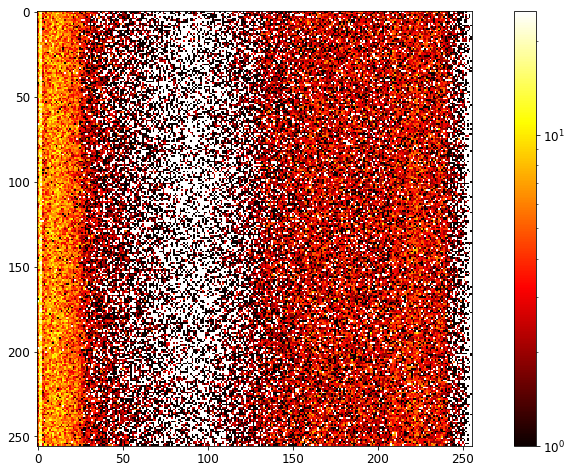

In [116]:
from matplotlib.colors import LogNorm
plt.imshow(dynamicSpectrum[:, :], cmap='hot', norm = LogNorm())
plt.colorbar()

# Spectral analysis

In [17]:
# fluxTable

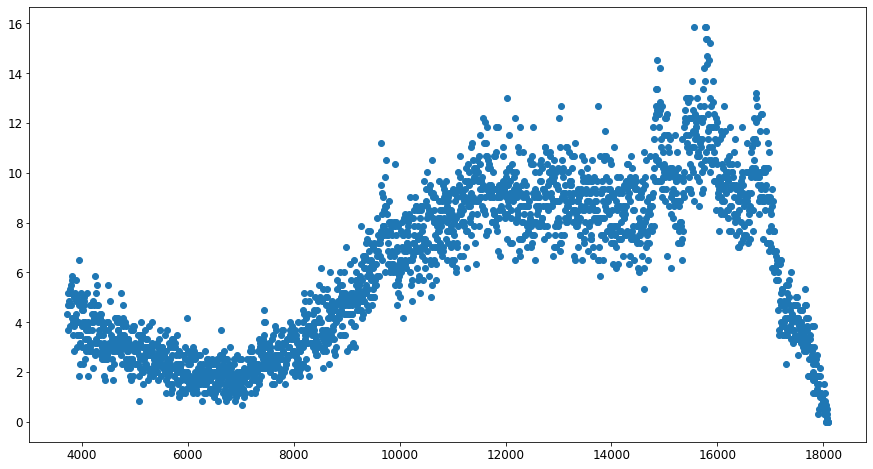

In [127]:
plt.scatter(energyPt[600:], 0.1670*fluxPt[600:])

In [15]:
from scipy.optimize import curve_fit

In [19]:
def exponentialCutoffPowerLaw(x, A, alpha, eNought, beta, eCutoff):
    return A*((x/eNought)**(-alpha))*np.exp(-(x/eCutoff)**(beta))

In [49]:
pOpt, pCov = curve_fit(exponentialCutoffPowerLaw, energyPt[600:], 0.1670*fluxPt[600:], p0 = [12, 2.4, 5000, 2.4, 10])
pOpt

array([ 1.73786318e+01,  2.07473800e+00,  3.06941606e+03, -4.52805420e+01,
        2.11779884e+05])

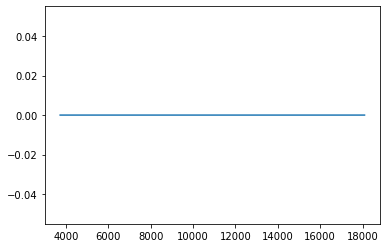

In [48]:
# plt.scatter(energyPt[600:], 0.1670*fluxPt[600:])
plt.plot(energyPt[600:], exponentialCutoffPowerLaw(energyPt[600:], *pOpt))